In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('euro_exchange_rate.csv')
print('DATASET SHAPE: ', df.shape)
df.head()

DATASET SHAPE:  (6206, 43)


,Date,USD,JPY,BGN,CYP,CZK,DKK,EEK,GBP,HUF,...,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR,Unnamed: 42
0,2023-03-23,1.0879,142.87,1.9558,NaN,23.658,7.4482,NaN,0.88523,384.75,...,89.4810,1396.18,20.1915,4.8063,1.7373,59.125,1.4434,37.119,19.7787,NaN
1,2023-03-22,1.0785,143.13,1.9558,NaN,23.722,7.4472,NaN,0.87925,388.55,...,89.0800,1406.43,20.0036,4.8047,1.7362,58.683,1.4391,37.100,19.8529,NaN
2,2023-03-21,1.0776,142.63,1.9558,NaN,23.846,7.4465,NaN,0.88033,391.58,...,89.0308,1406.34,20.1454,4.8196,1.7412,58.485,1.4392,36.929,19.9659,NaN
3,2023-03-20,1.0717,140.77,1.9558,NaN,23.988,7.4450,NaN,0.87560,399.21,...,88.4900,1401.82,20.3003,4.8076,1.7106,58.281,1.4354,36.513,19.7861,NaN
4,2023-03-17,1.0623,140.57,1.9558,NaN,23.948,7.4450,NaN,0.87488,395.93,...,87.7870,1389.84,19.9829,4.7649,1.7014,58.118,1.4262,36.246,19.4988,NaN


In [3]:
df=df.drop('Unnamed: 42', axis=1)
df.columns

Index(['Date', 'USD', 'JPY', 'BGN', 'CYP', 'CZK', 'DKK', 'EEK', 'GBP', 'HUF',
       'LTL', 'LVL', 'MTL', 'PLN', 'ROL', 'RON', 'SEK', 'SIT', 'SKK', 'CHF',
       'ISK', 'NOK', 'HRK', 'RUB', 'TRL', 'TRY', 'AUD', 'BRL', 'CAD', 'CNY',
       'HKD', 'IDR', 'ILS', 'INR', 'KRW', 'MXN', 'MYR', 'NZD', 'PHP', 'SGD',
       'THB', 'ZAR'],
      dtype='object')

In [4]:
#show columns
df['Date'] = pd.to_datetime(df['Date'])
df.columns

Index(['Date', 'USD', 'JPY', 'BGN', 'CYP', 'CZK', 'DKK', 'EEK', 'GBP', 'HUF',
       'LTL', 'LVL', 'MTL', 'PLN', 'ROL', 'RON', 'SEK', 'SIT', 'SKK', 'CHF',
       'ISK', 'NOK', 'HRK', 'RUB', 'TRL', 'TRY', 'AUD', 'BRL', 'CAD', 'CNY',
       'HKD', 'IDR', 'ILS', 'INR', 'KRW', 'MXN', 'MYR', 'NZD', 'PHP', 'SGD',
       'THB', 'ZAR'],
      dtype='object')

Print full rows having NULL entries in the df

In [5]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

In [6]:
df.isnull().sum()

Date       0
USD        0
JPY        0
BGN      398
CYP     3902
CZK        0
DKK        0
EEK     3132
GBP        0
HUF        0
LTL     2109
LVL     2364
MTL     3902
PLN        0
ROL     4542
RON     1664
SEK        0
SIT     4157
SKK     3646
CHF        0
ISK     2341
NOK        0
HRK     1658
RUB     1873
TRL     4669
TRY     1537
AUD        0
BRL     2304
CAD        0
CNY     1599
HKD        0
IDR     1599
ILS     3074
INR     2560
KRW        0
MXN     2304
MYR     1599
NZD        0
PHP     1599
SGD        0
THB     1599
ZAR        0
dtype: int64

In [7]:
print(rows_with_NaN)

           Date     USD     JPY     BGN      CYP     CZK     DKK      EEK  \
0    2023-03-23  1.0879  142.87  1.9558      NaN  23.658  7.4482      NaN   
1    2023-03-22  1.0785  143.13  1.9558      NaN  23.722  7.4472      NaN   
2    2023-03-21  1.0776  142.63  1.9558      NaN  23.846  7.4465      NaN   
3    2023-03-20  1.0717  140.77  1.9558      NaN  23.988  7.4450      NaN   
4    2023-03-17  1.0623  140.57  1.9558      NaN  23.948  7.4450      NaN   
...         ...     ...     ...     ...      ...     ...     ...      ...   
6201 1999-01-08  1.1659  130.09     NaN  0.58187  34.938  7.4433  15.6466   
6202 1999-01-07  1.1632  129.43     NaN  0.58187  34.886  7.4431  15.6466   
6203 1999-01-06  1.1743  131.42     NaN  0.58200  34.850  7.4452  15.6466   
6204 1999-01-05  1.1790  130.96     NaN  0.58230  34.917  7.4495  15.6466   
6205 1999-01-04  1.1789  133.73     NaN  0.58231  35.107  7.4501  15.6466   

          GBP     HUF  ...     ILS      INR      KRW      MXN     MYR     N

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6206 entries, 0 to 6205
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6206 non-null   datetime64[ns]
 1   USD     6206 non-null   float64       
 2   JPY     6206 non-null   float64       
 3   BGN     5808 non-null   float64       
 4   CYP     2304 non-null   float64       
 5   CZK     6206 non-null   float64       
 6   DKK     6206 non-null   float64       
 7   EEK     3074 non-null   float64       
 8   GBP     6206 non-null   float64       
 9   HUF     6206 non-null   float64       
 10  LTL     4097 non-null   float64       
 11  LVL     3842 non-null   float64       
 12  MTL     2304 non-null   float64       
 13  PLN     6206 non-null   float64       
 14  ROL     1664 non-null   float64       
 15  RON     4542 non-null   float64       
 16  SEK     6206 non-null   float64       
 17  SIT     2049 non-null   float64       
 18  SKK     

In [9]:
df5=df.loc[:,['Date','USD', 'JPY', 'GBP', 'AUD', 'CAD']]
df5.head()

,Date,USD,JPY,GBP,AUD,CAD
0,2023-03-23,1.0879,142.87,0.88523,1.6242,1.4875
1,2023-03-22,1.0785,143.13,0.87925,1.6132,1.4782
2,2023-03-21,1.0776,142.63,0.88033,1.6136,1.4726
3,2023-03-20,1.0717,140.77,0.87560,1.5978,1.4669
4,2023-03-17,1.0623,140.57,0.87488,1.5874,1.4584


In [10]:
df5_list = ['USD', 'JPY', 'GBP', 'AUD', 'CAD']

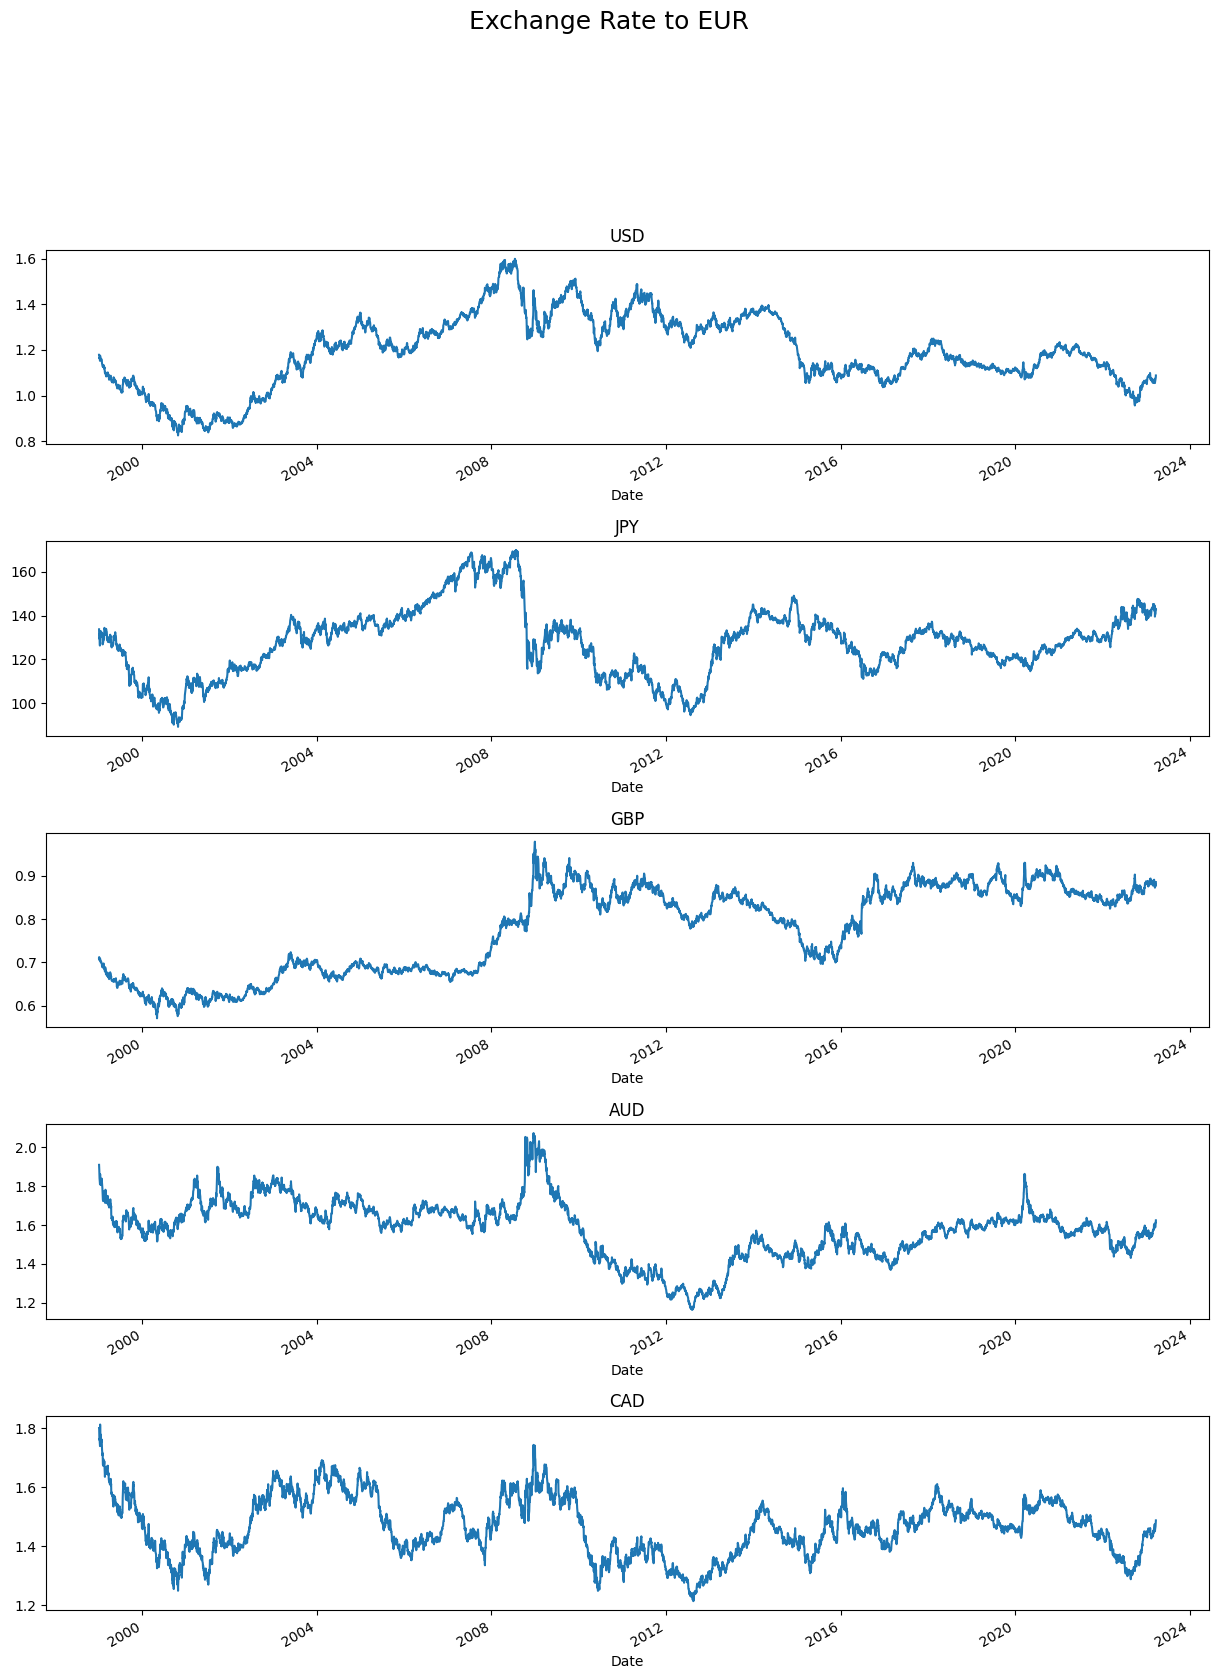

In [11]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Exchange Rate to EUR', fontsize=18,y=1)

# loop through the length of currencies and keep track of index
for n, currency in enumerate(df5_list):
    # add new subplot iteratively
    ax = plt.subplot(5,1,n+1)
    df5.plot(x='Date',y=currency,ax=ax, legend=None)
    # chart formating
    ax.set_title(currency.upper()) 

In [12]:
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models.annotations import Title
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Spectral10


source = ColumnDataSource(df5)

output_notebook()

p = figure(plot_height = 500, \
           plot_width = 900, \
           x_axis_type = 'datetime')

p.line(x='Date', y='USD', legend_label = 'USD', source=source, color=Spectral10[1], line_width=4)
p.line(x='Date', y='JPY', legend_label = 'JPY', source=source, color=Spectral10[2], line_width=4)
p.line(x='Date', y='GBP', legend_label = 'GBP', source=source, color=Spectral10[3], line_width=4)
p.line(x='Date', y='AUD', legend_label = 'AUD', source=source, color=Spectral10[4], line_width=4)
p.line(x='Date', y='CAD', legend_label = 'CAD', source=source, color=Spectral10[5], line_width=4)


p.xaxis[0].ticker.desired_num_ticks = 20

p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Exchange Rate'

t = Title()
t.text = 'Exchange Rate: Top Countries/USD'
p.title = t

hover = HoverTool(tooltips = [
                  ('USD','@USD'),\
                  ('JPY', '@JPY'),\
                  ('GBP', '@GBP'),\
                  ('AUD', '@AUD'),\
                  ('CAD', '@CAD')])
p.add_tools(hover)
show(p)

Loading BokehJS ...

## Stationarity Check

#### Method 1: Perform the Augmented Dickey-Fuller (ADF) 
We can alscheck for staionarity with statistical tests


- A Time Series is said to be stationary if its statistical properties such as mean, variance remain constant over time.
- Most of the Time Series models work on the assumption that the TS is stationary. Major reason for this is that there are many ways in which a series can be non-stationary, but only one way for stationarity.
- Intuitively, we can say that if a Time Series has a particular behaviour over time, there is a very high probability that it will follow the same in the future.
- Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

The Dickey Fuller test is used to check the stationarity of the series. The test determines how stringly a time series is defined by a trend. The null hypothesis of the test is that time series is not stationary( has some time-dependent structure).<br>
The test result is made up of a Test Statistic and some Critical Values for different confidence levels. If P-VALUE is less than the significance level , the null hypothesis is rejected and the series is stationary.

The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. The ADF tests give the following results – test statistic, p-value, and critical value at 1%, 5%, and 10% confidence intervals <br>
The test result is made up of a Test Statistic and some Critical Values for different confidence levels. If P-VALUE is less than the significance level , the null hypothesis is rejected and the series is stationary.

if p_value > 0.05 and the stat_value > any of the critical values:
* Acceptiong the Null Hypothesis i.e Dataset is Non-Stationary

else:
* Rejecting the Null Hypothesis i.e Dataset is Stationary

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
#Test whether the data is stationary to be able to use ARIMA model or not

#4.1 Stationary Testing using ADF Test
#H0: Dataset is not stationary
#H1: Dataset is stationary
for n, currency in enumerate(df5): 
    print(currency)
    result = adfuller(df5[currency].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')  
        
    if result[1] > 0.05:
        print('Non-Stationary')
    else:
        print('Stationary')
    print('====================================')

Date
ADF Statistic: -2.733386
p-value: 0.068437
Critial Values:
   1%, -3.4314101235178227
Critial Values:
   5%, -2.862008479527451
Critial Values:
   10%, -2.5670193688532894
Non-Stationary
USD
ADF Statistic: -1.881689
p-value: 0.340724
Critial Values:
   1%, -3.431406355974594
Critial Values:
   5%, -2.8620068149070077
Critial Values:
   10%, -2.5670184827348006
Non-Stationary
JPY
ADF Statistic: -2.406025
p-value: 0.140043
Critial Values:
   1%, -3.4314043122160833
Critial Values:
   5%, -2.862005911908604
Critial Values:
   10%, -2.5670180020466455
Non-Stationary
GBP
ADF Statistic: -1.566984
p-value: 0.500154
Critial Values:
   1%, -3.4314080651691943
Critial Values:
   5%, -2.8620075700838123
Critial Values:
   10%, -2.567018884733981
Non-Stationary
AUD
ADF Statistic: -2.173736
p-value: 0.215915
Critial Values:
   1%, -3.431405162820285
Critial Values:
   5%, -2.8620062877330406
Critial Values:
   10%, -2.56701820210718
Non-Stationary
CAD
ADF Statistic: -2.294138
p-value: 0.173865

The p-value obtained is greater than the significance level of 0.05, and the ADF statistic is greater than any of the critical values. Clearly, there is no reason to reject the null hypothesis. So, the time series is, non-stationary.
Based on the obtained ADF statistic and p-value, it shows that the time series data_USD, JPY, GBP, AUD,CAD are non-stationary.

### USD /EUR

In [15]:
#get the date and rates of singapore dollar
df_usd = df5[['Date', 'USD']]
df_usd.columns = ['Date', 'USD']
df_usd.sort_values(by='Date', inplace = True)

In [16]:
df_usd.head()

,Date,USD
6205,1999-01-04,1.1789
6204,1999-01-05,1.1790
6203,1999-01-06,1.1743
6202,1999-01-07,1.1632
6201,1999-01-08,1.1659


In [17]:
df_usd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6206 entries, 6205 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6206 non-null   datetime64[ns]
 1   USD     6206 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 145.5 KB


In [18]:
#sort values by date
df_usd = df_usd.sort_values('Date', ascending=True)
df_usd.USD.describe()

count    6206.000000
mean        1.191688
std         0.158322
min         0.825200
25%         1.090300
50%         1.185850
75%         1.310525
max         1.599000
Name: USD, dtype: float64

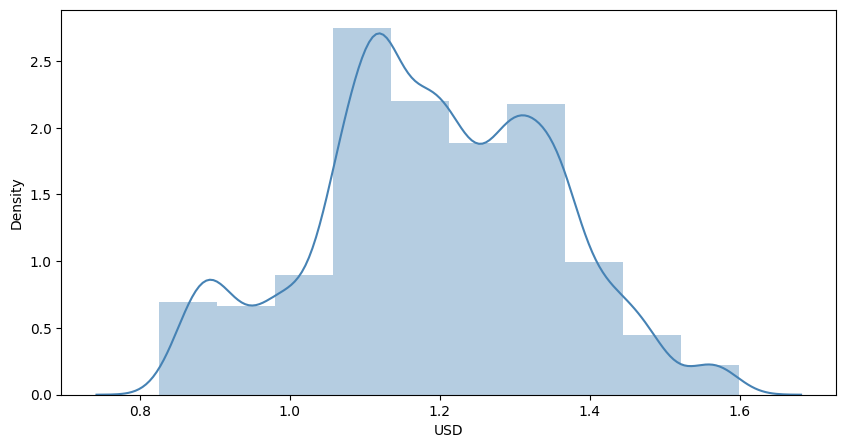

In [19]:
plt.figure(figsize=(10,5))
sns.distplot(df_usd.USD, bins=10, color='steelblue');

###  ACF and PACF plots
ACF and PACF plots: If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points.

Let's review the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots
If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points.
This data is non-stationary as a high number of previous observations are correlated with future values.
Confidence intervals are drawn as a cone.
By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.
The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

In [20]:
df_usd = df_usd.set_index('Date')

<Figure size 1200x600 with 0 Axes>

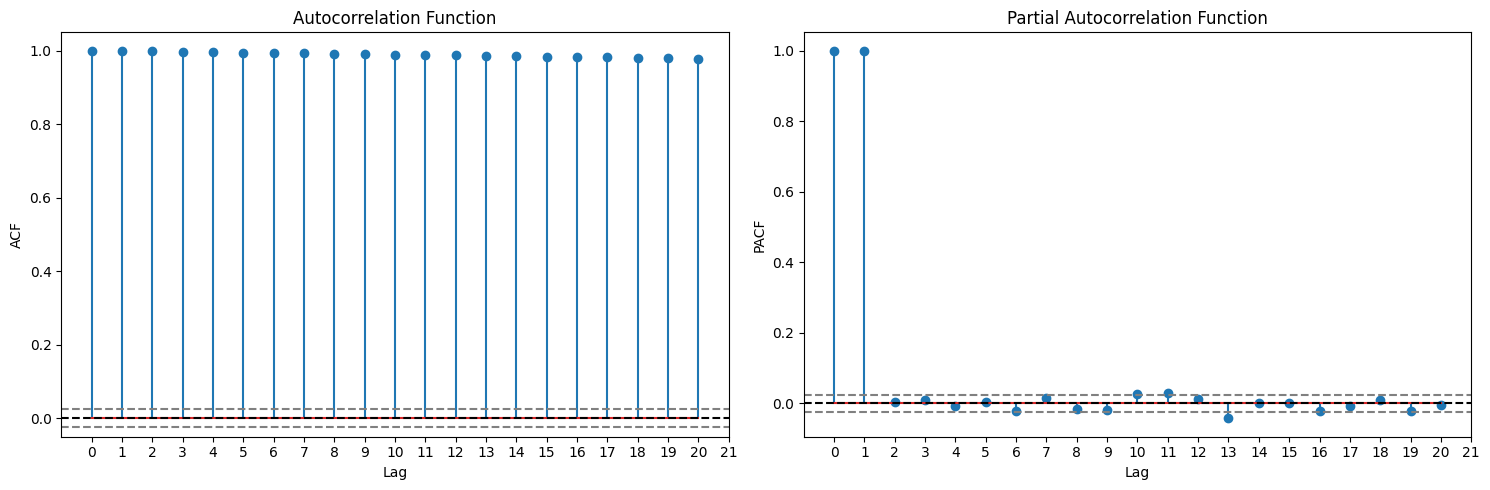

In [21]:
plt.figure(figsize=(12,6))
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df_usd.USD, nlags = 20)
lag_pacf = pacf(df_usd.USD, nlags = 20, method = 'ols')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(df_usd)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_usd)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color='black')
plt.axhline(y = -1.96/np.sqrt(len(df_usd)), linestyle = '--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(df_usd)), linestyle = '--', color='gray')
plt.xlabel('Lag')
plt.xticks(range(0,22,1))
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()
     

- The ACF plot shows that the correlations with the legs are high and positive with very slow decay which means that the future values have a very high correlation with its past values.
- The partial autocorrelation shows a high correlation with the first lag and lesser correlation with the second and third lag.

### Seasonal decomposition plot: seasonal decomposition using movning averages.

We can create a time series comprised of a linearly increasing trend from 1 to 99 and some random noise and decompose it as an additive model.
Because the time series was contrived and was provided as an array of numbers, we must specify the frequency of the observations (the period=1 argument). If a Pandas Series object is provided, this argument is not required. (https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/)

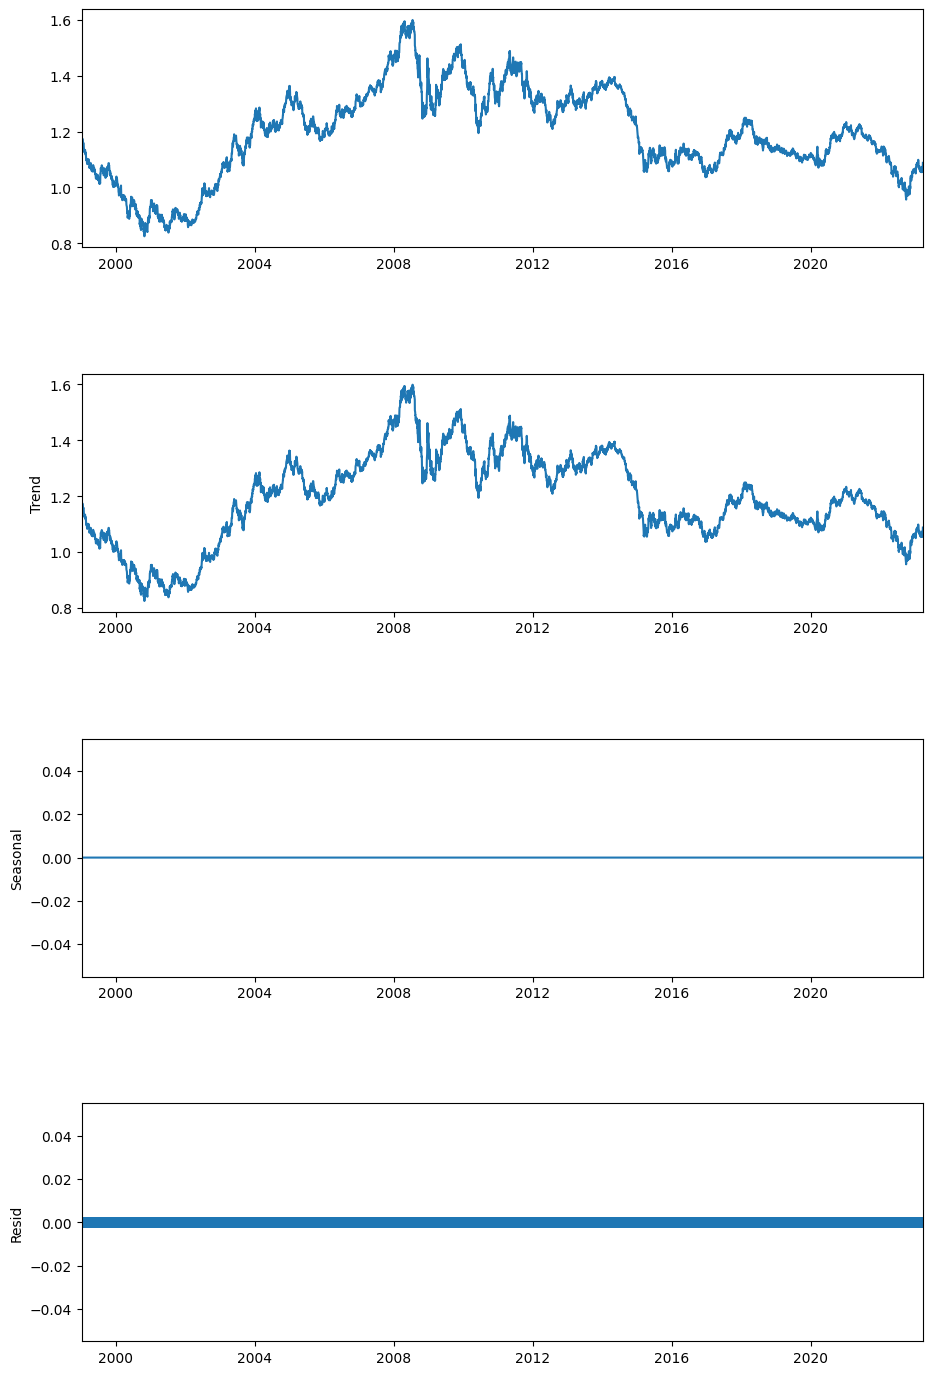

In [22]:
decompostion =sm.tsa.seasonal_decompose(df_usd, model='additive', period=1) 
fig=decompostion.plot()
fig.set_size_inches(10,15)
plt.show()

We can see that the entire series was taken as the trend component and that there was no seasonality.
The residual plot shows zero. The decomposition was not able to separate the noise that we added from the linear trend.

### Differenecing
If original series is nonstaintaionary, differencing might be needed.
Let's try it out on the training dataset and plot the new series,I use the current observation minus the previous observation to get the new series, also use the drop na method since the first observation has no previous observation to subtract so its difference is missing.

In [23]:
diff_data = df_usd.copy()
diff_data = diff_data.diff()
diff_data = diff_data.dropna() 

print('############# Raw Data ##############')
print(df_usd)
print ('########### Differenced Data ###########')
print(diff_data)

############# Raw Data ##############
               USD
Date              
1999-01-04  1.1789
1999-01-05  1.1790
1999-01-06  1.1743
1999-01-07  1.1632
1999-01-08  1.1659
...            ...
2023-03-17  1.0623
2023-03-20  1.0717
2023-03-21  1.0776
2023-03-22  1.0785
2023-03-23  1.0879

[6206 rows x 1 columns]
########### Differenced Data ###########
               USD
Date              
1999-01-05  0.0001
1999-01-06 -0.0047
1999-01-07 -0.0111
1999-01-08  0.0027
1999-01-11 -0.0090
...            ...
2023-03-17  0.0028
2023-03-20  0.0094
2023-03-21  0.0059
2023-03-22  0.0009
2023-03-23  0.0094

[6205 rows x 1 columns]


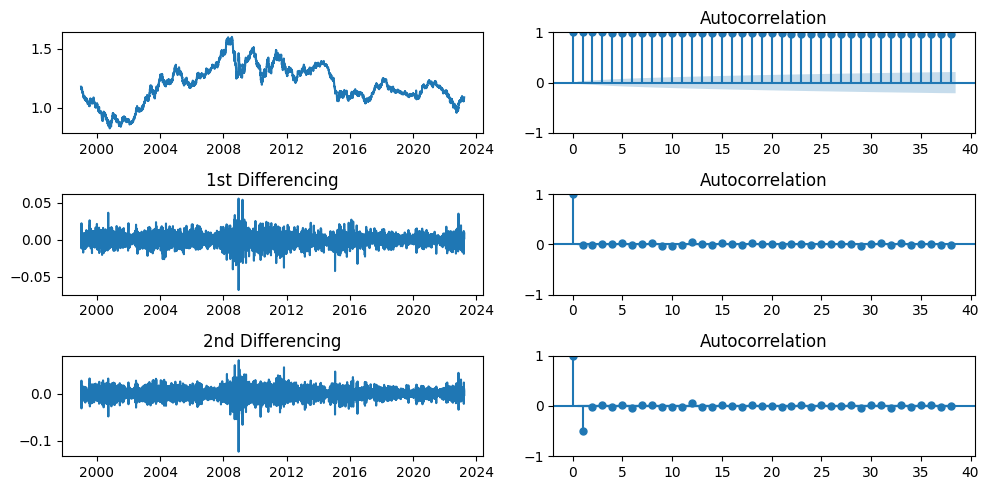

In [24]:
fig, axes = plt.subplots(3, 2, figsize=(10,5))
axes[0, 0].plot(df_usd)
plot_acf(df_usd, ax=axes[0, 1])

# # 1st Differencing
axes[1, 0].plot(df_usd.diff())
plot_acf(df_usd.diff().dropna(), ax=axes[1, 1])
axes[1, 0].set_title('1st Differencing')

# # 2nd Differencing
axes[2, 0].plot(df_usd.diff().diff())
plot_acf(df_usd.diff().diff().dropna(), ax=axes[2, 1])
axes[2, 0].set_title('2nd Differencing')

plt.tight_layout()

In [25]:
result = adfuller(diff_data)

print('ADF Statistic: %f' % result[0])
print('p-value %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -22.494993
p-value 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


<Figure size 1200x600 with 0 Axes>

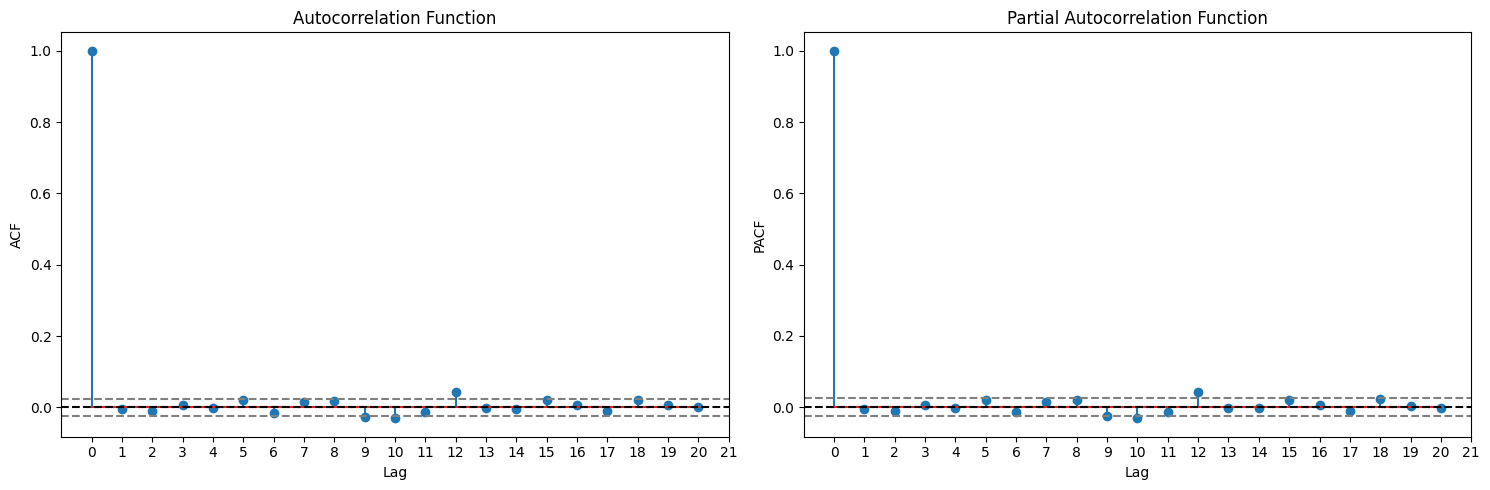

In [26]:
plt.figure(figsize=(12,6))

lag_acf = acf(diff_data, nlags = 20)
lag_pacf = pacf(diff_data, nlags = 20, method = 'ols')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(diff_data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff_data)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color='black')
plt.axhline(y = -1.96/np.sqrt(len(diff_data)), linestyle = '--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(diff_data)), linestyle = '--', color='gray')
plt.xlabel('Lag')
plt.xticks(range(0,22,1))
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [27]:
dfdg

NameError: name 'dfdg' is not defined

### FORECASTING 

The dataset will be split into train set and test set. The test will consist of 2019 data, while the rest of the data will be included in the training set.

In [28]:
train = df_usd[df_usd.index.year < 2022]
test = df_usd[df_usd.index.year == 2022]
len(train), len(test)

(5890, 257)

### ARIMA 

In [31]:
from pmdarima.arima import auto_arima

auto_arima=auto_arima(train, start_p=1, start_q=1,
                      max_p=3, max_q=3, seasonal=False,
                      d=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-41383.266, Time=0.67 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-41381.367, Time=1.00 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-41379.947, Time=1.80 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-41378.510, Time=2.47 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-41381.365, Time=0.61 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-41378.951, Time=1.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-41377.063, Time=5.00 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-41377.103, Time=2.99 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-41379.960, Time=2.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-41374.508, Time=2.13 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-41375.260, Time=1.85 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-41372.875, Time=3.35 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-41378.483, Time=1.58 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-41376.483, Time=2.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-41373

By default the auto process uses unit root test to select the value of parameter d Then uses AIC information criteria to determine the values of p and q

In [32]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5890
Model:               SARIMAX(0, 1, 0)   Log Likelihood               20693.633
Date:                Wed, 10 May 2023   AIC                         -41383.266
Time:                        09:10:00   BIC                         -41369.905
Sample:                             0   HQIC                        -41378.622
                               - 5890                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -7.862e-06    9.4e-05     -0.084      0.933      -0.000       0.000
sigma2      5.192e-05   5.41e-07     95.991      0.000    5.09e-05     5.3e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              4488.60
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
predictions = []
arima = ARIMA(train, order=(0,1,0)).fit()

In [34]:
predictions.append(arima.forecast(257))

In [35]:
predictions = np.array(predictions).reshape((257,))
predictions

array([1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326,
       1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326,
       1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326,
       1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326,
       1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326,
       1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326,
       1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326,
       1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326,
       1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326,
       1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326,
       1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326,
       1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326,
       1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326,
       1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326, 1.1326,
      

In [36]:
test['arima_pred'] = predictions

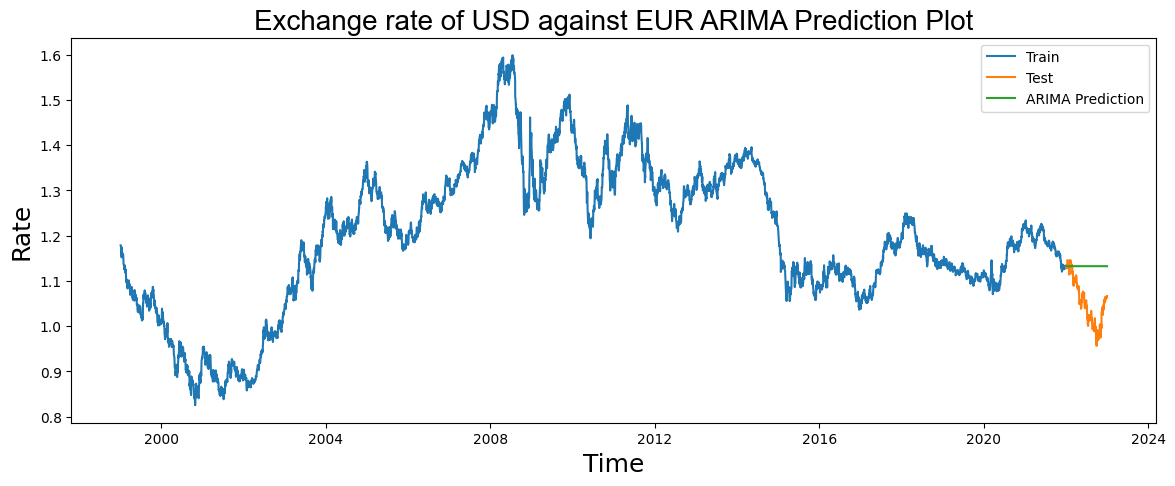

In [37]:
plt.figure(figsize=(14,5))
plt.plot(train.index,train['USD'].values, label = 'Train')   
plt.plot([None for i in train.index] + [x for x in test.index], [None for i in train.values] + [x for x in test['USD'].values], label = 'Test')
plt.plot([None for i in train.index] + [x for x in test.index],[None for i in train.values] + [x for x in test['arima_pred'].values], label = 'ARIMA Prediction')
plt.title('Exchange rate of USD against EUR ARIMA Prediction Plot', family='Arial', fontsize=20)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Rate', fontsize=18)
plt.legend(loc = 'best')

In [38]:
arima_mae = mean_absolute_error(test['USD'],test['arima_pred'])
arima_mse = mean_squared_error(test['USD'], test['arima_pred'])
arima_rmse = np.sqrt(mean_squared_error(test['USD'], test['arima_pred']))
mape = mean_absolute_percentage_error(test['USD'], test['arima_pred'])
accuracy = (1-mape)*100

print('Mean Absolute Error:   ', arima_mae)
print('Mean Squared Error:   ', arima_mse)
print('Root Mean Squared Error:   ', arima_rmse)
print('mape:   ', mape)
print('accuracy:   ', accuracy)

Mean Absolute Error:    0.08060116731517514
Mean Squared Error:    0.008849766264591446
Root Mean Squared Error:    0.09407319631325092
mape:    0.07889857950549772
accuracy:    92.11014204945023


### JPY/EUR

In [39]:
#get the date and rates of singapore dollar
df_jpy = df5[['Date', 'JPY']]
df_jpy.columns = ['Date', 'JPY']
df_jpy.sort_values(by='Date', inplace = True)

In [40]:
df_jpy.head()

,Date,JPY
6205,1999-01-04,133.73
6204,1999-01-05,130.96
6203,1999-01-06,131.42
6202,1999-01-07,129.43
6201,1999-01-08,130.09


In [41]:
df_jpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6206 entries, 6205 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6206 non-null   datetime64[ns]
 1   JPY     6206 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 145.5 KB


In [42]:
#sort values by date
df_jpy = df_jpy.sort_values('Date', ascending=True)
df_jpy.JPY.describe()

count    6206.000000
mean      127.753489
std        15.477305
min        89.300000
25%       117.180000
50%       128.855000
75%       136.167500
max       169.750000
Name: JPY, dtype: float64

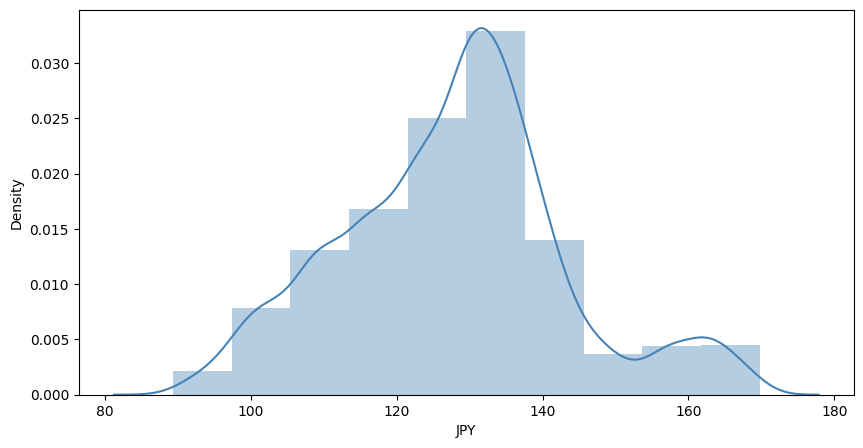

In [43]:
plt.figure(figsize=(10,5))
sns.distplot(df_jpy.JPY, bins=10, color='steelblue');

### ACF and PACF plots

In [44]:
df_jpy = df_jpy.set_index('Date')

<Figure size 1200x600 with 0 Axes>

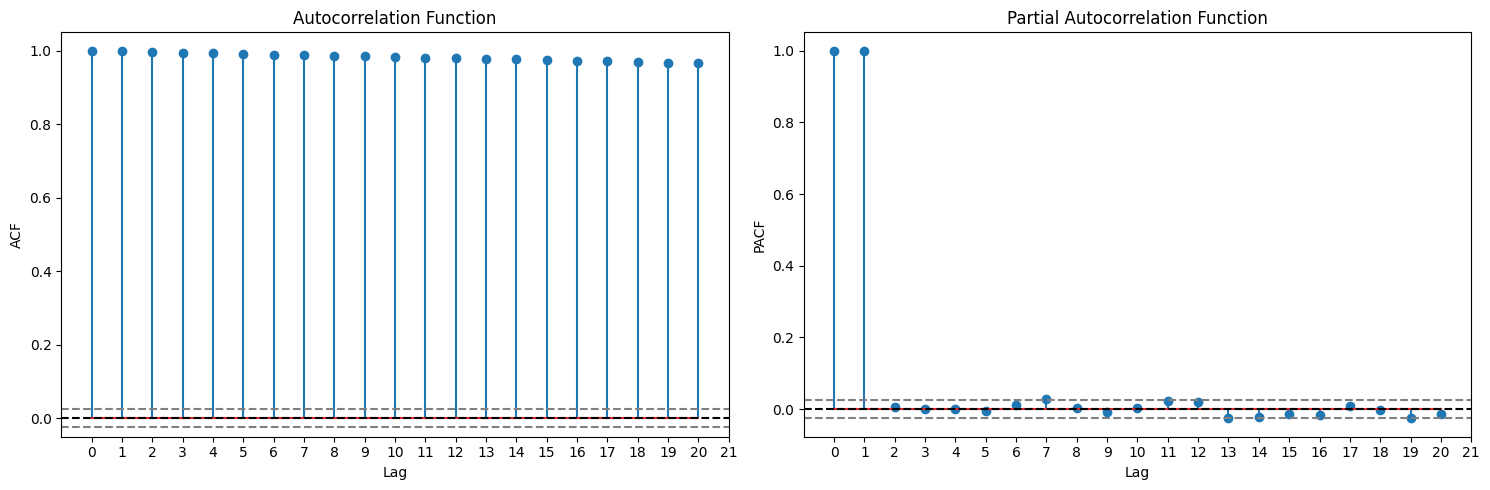

In [45]:
plt.figure(figsize=(12,6))
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df_jpy.JPY, nlags = 20)
lag_pacf = pacf(df_jpy.JPY, nlags = 20, method = 'ols')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(df_jpy)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_jpy)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color='black')
plt.axhline(y = -1.96/np.sqrt(len(df_jpy)), linestyle = '--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(df_jpy)), linestyle = '--', color='gray')
plt.xlabel('Lag')
plt.xticks(range(0,22,1))
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

### Seasonal decomposition plot: seasonal decomposition using movning averages.

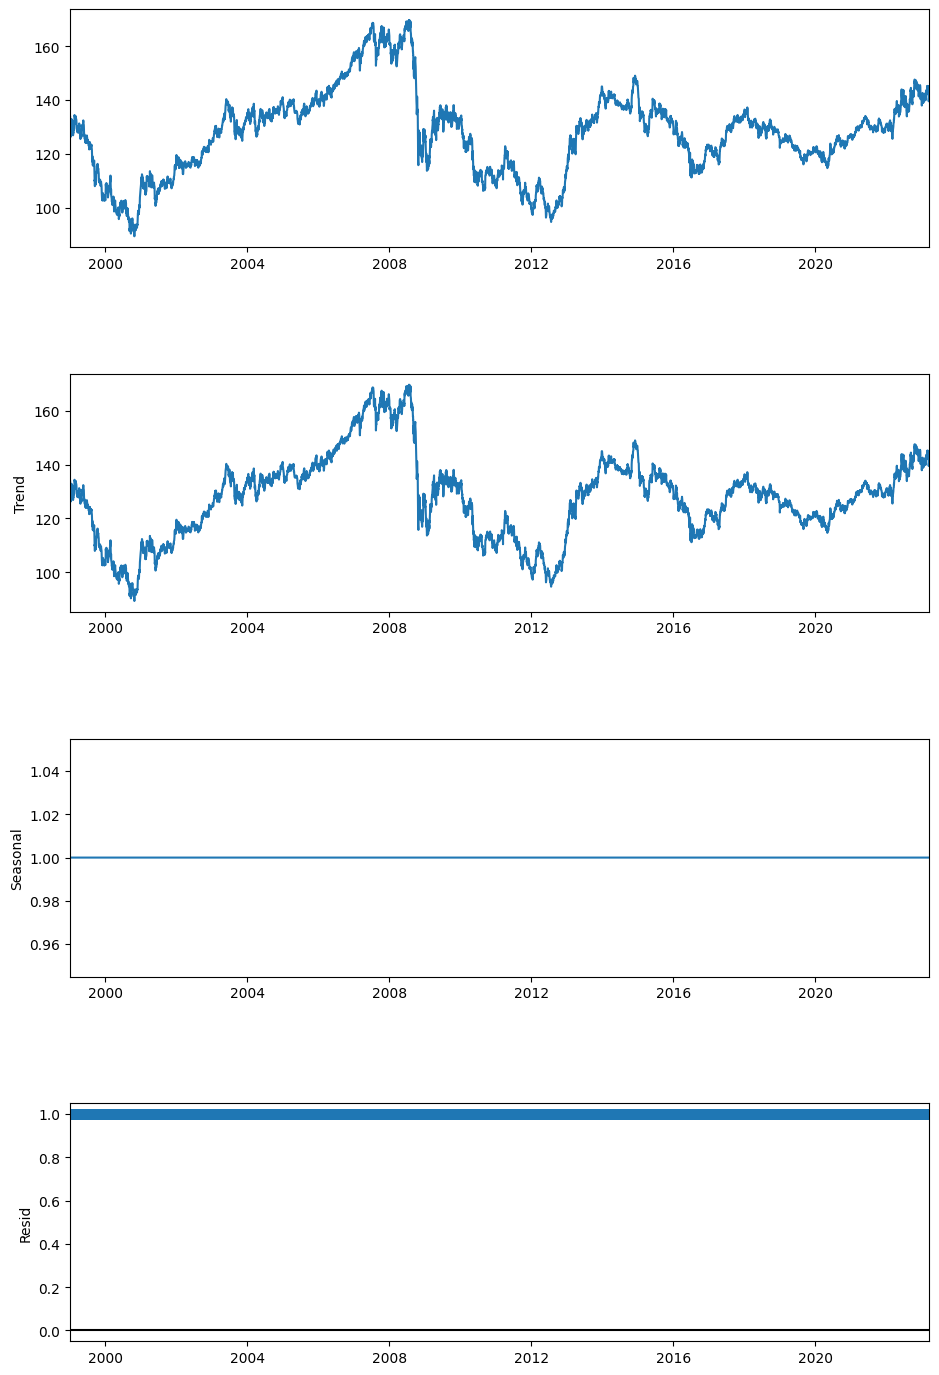

In [47]:
decompostion =seasonal_decompose(df_jpy, model='multiplicative', period=1)
fig=decompostion.plot()
fig.set_size_inches(10,15)
plt.show()

Residuals: The resisdual component tends around the value of 1. Makes sense since we are using the multiplicative model.

### Differenecing

In [48]:
diff_data = df_jpy.copy()
diff_data = diff_data.diff()
diff_data = diff_data.dropna() 

print('############# Raw Data ##############')
print(df_jpy)
print ('########### Differenced Data ###########')
print(diff_data)

############# Raw Data ##############
               JPY
Date              
1999-01-04  133.73
1999-01-05  130.96
1999-01-06  131.42
1999-01-07  129.43
1999-01-08  130.09
...            ...
2023-03-17  140.57
2023-03-20  140.77
2023-03-21  142.63
2023-03-22  143.13
2023-03-23  142.87

[6206 rows x 1 columns]
########### Differenced Data ###########
             JPY
Date            
1999-01-05 -2.77
1999-01-06  0.46
1999-01-07 -1.99
1999-01-08  0.66
1999-01-11 -3.76
...          ...
2023-03-17  0.39
2023-03-20  0.20
2023-03-21  1.86
2023-03-22  0.50
2023-03-23 -0.26

[6205 rows x 1 columns]


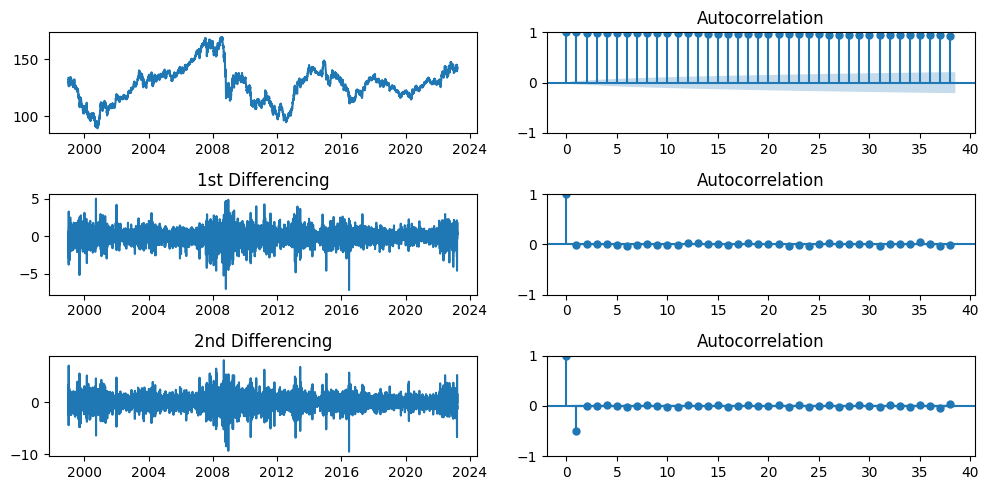

In [50]:
fig, axes = plt.subplots(3, 2, figsize=(10,5))
axes[0, 0].plot(df_jpy)
plot_acf(df_jpy, ax=axes[0, 1])

# # 1st Differencing
axes[1, 0].plot(df_jpy.diff())
plot_acf(df_jpy.diff().dropna(), ax=axes[1, 1])
axes[1, 0].set_title('1st Differencing')

# # 2nd Differencing
axes[2, 0].plot(df_jpy.diff().diff())
plot_acf(df_jpy.diff().diff().dropna(), ax=axes[2, 1])
axes[2, 0].set_title('2nd Differencing')

plt.tight_layout()

In [51]:
result = adfuller(diff_data)

print('ADF Statistic: %f' % result[0])
print('p-value %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -79.447008
p-value 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


<Figure size 1200x600 with 0 Axes>

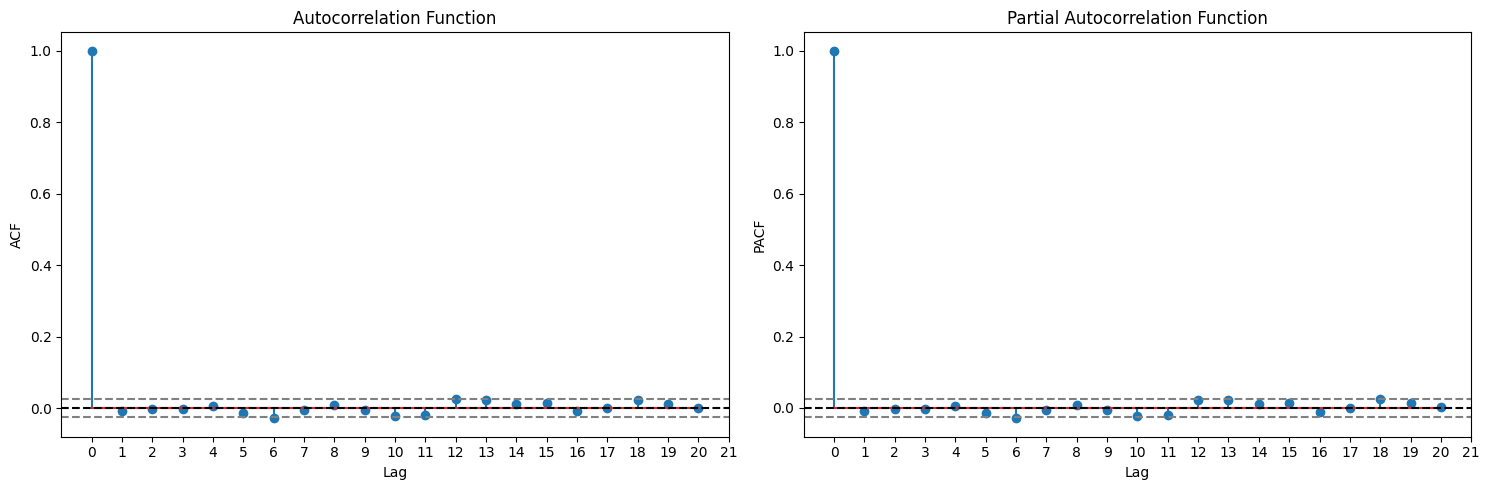

In [52]:
plt.figure(figsize=(12,6))

lag_acf = acf(diff_data, nlags = 20)
lag_pacf = pacf(diff_data, nlags = 20, method = 'ols')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(diff_data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff_data)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color='black')
plt.axhline(y = -1.96/np.sqrt(len(diff_data)), linestyle = '--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(diff_data)), linestyle = '--', color='gray')
plt.xlabel('Lag')
plt.xticks(range(0,22,1))
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

### FORECASTING 

In [55]:
train_jpy = df_jpy[df_jpy.index.year< 2022]
test_jpy = df_jpy[df_jpy.index.year== 2022]
len(train_jpy), len(test_jpy)

(5890, 257)

### ARIMA 

In [56]:
from pmdarima.arima import auto_arima

auto_arima=auto_arima(train_jpy, start_p=1, start_q=1,
                      max_p=3, max_q=3, seasonal=False,
                      d=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15516.622, Time=1.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15518.327, Time=0.60 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=15520.264, Time=0.77 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=15522.260, Time=0.85 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15518.329, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15520.245, Time=0.68 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15522.264, Time=0.92 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=15524.248, Time=1.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=15520.262, Time=0.62 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=15522.277, Time=0.78 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15524.263, Time=0.90 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=15518.357, Time=9.90 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=15522.259, Time=1.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=15524.259, Time=1.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=15526.259, Time=1.30

In [57]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5890
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -7756.311
Date:                Wed, 10 May 2023   AIC                          15516.622
Time:                        09:15:16   BIC                          15529.983
Sample:                             0   HQIC                         15521.266
                               - 5890                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0006      0.012     -0.048      0.962      -0.024       0.023
sigma2         0.8157      0.008     96.678      0.000       0.799       0.832
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):              5121.00
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
predictions = []
arima = ARIMA(train_jpy, order=(0,1,0)).fit()

In [63]:
predictions.append(arima.forecast(257))

In [64]:
predictions = np.array(predictions).reshape((257,))
predictions

array([130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38,
       130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38,
       130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38,
       130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38,
       130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38,
       130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38,
       130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38,
       130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38,
       130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38,
       130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38,
       130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38,
       130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38,
       130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38,
       130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38, 130.38,
      

In [66]:
test_jpy['arima_pred'] = predictions

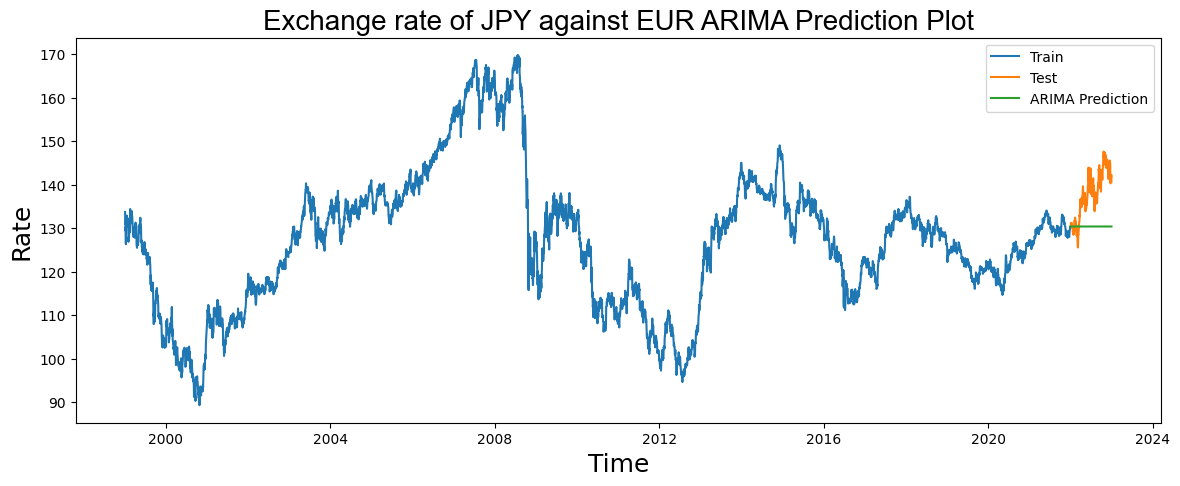

In [67]:
plt.figure(figsize=(14,5))
plt.plot(train_jpy.index,train_jpy['JPY'].values, label = 'Train')   
plt.plot([None for i in train_jpy.index] + [x for x in test_jpy.index], [None for i in train_jpy.values] + [x for x in test_jpy['JPY'].values], label = 'Test')
plt.plot([None for i in train_jpy.index] + [x for x in test_jpy.index],[None for i in train_jpy.values] + [x for x in test_jpy['arima_pred'].values], label = 'ARIMA Prediction')
plt.title('Exchange rate of JPY against EUR ARIMA Prediction Plot', family='Arial', fontsize=20)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Rate', fontsize=18)
plt.legend(loc = 'best')

In [68]:
arima_mae = mean_absolute_error(test_jpy['JPY'],test_jpy['arima_pred'])
arima_mse = mean_squared_error(test_jpy['JPY'], test_jpy['arima_pred'])
arima_rmse = np.sqrt(mean_squared_error(test_jpy['JPY'], test_jpy['arima_pred']))
mape = mean_absolute_percentage_error(test_jpy['JPY'], test_jpy['arima_pred'])
accuracy = (1-mape)*100

print('Mean Absolute Error:   ', arima_mae)
print('Mean Squared Error:   ', arima_mse)
print('Root Mean Squared Error:   ', arima_rmse)
print('mape:   ', mape)
print('accuracy:   ', accuracy)

Mean Absolute Error:    8.029494163424127
Mean Squared Error:    88.44962490272381
Root Mean Squared Error:    9.404766073790661
mape:    0.056886462067133485
accuracy:    94.31135379328666


### GBP/EUR

In [69]:
#get the date and rates of singapore dollar
df_gbp = df5[['Date', 'GBP']]
df_gbp.columns = ['Date', 'GBP']
df_gbp.sort_values(by='Date', inplace = True)

In [70]:
df_gbp.head()

,Date,GBP
6205,1999-01-04,0.71110
6204,1999-01-05,0.71220
6203,1999-01-06,0.70760
6202,1999-01-07,0.70585
6201,1999-01-08,0.70940


In [71]:
df_gbp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6206 entries, 6205 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6206 non-null   datetime64[ns]
 1   GBP     6206 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 145.5 KB


In [72]:
#sort values by date
df_gbp = df_gbp.sort_values('Date', ascending=True)
df_gbp.GBP.describe()

count    6206.000000
mean        0.776309
std         0.099571
min         0.571100
25%         0.681013
50%         0.802075
75%         0.864073
max         0.978550
Name: GBP, dtype: float64

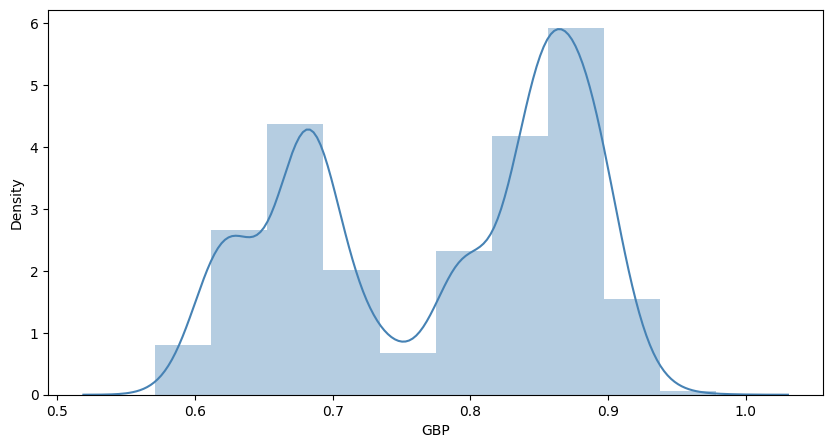

In [73]:
plt.figure(figsize=(10,5))
sns.distplot(df_gbp.GBP, bins=10, color='steelblue');

### ACF and PACF plots

In [74]:
df_gbp = df_gbp.set_index('Date')

<Figure size 1200x600 with 0 Axes>

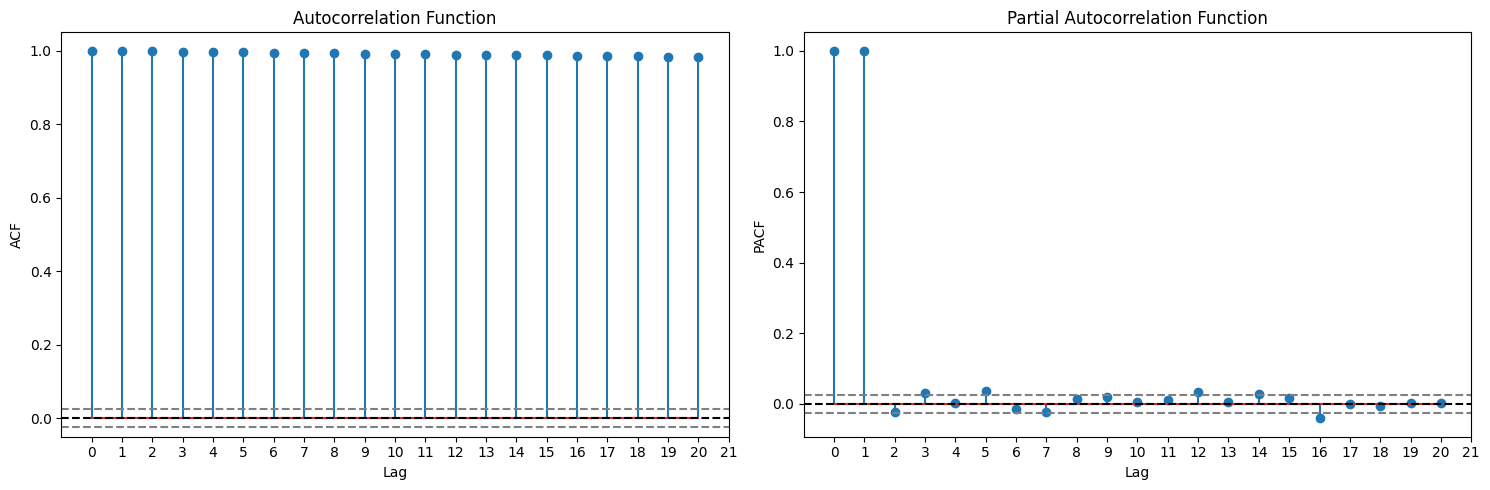

In [75]:
plt.figure(figsize=(12,6))
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df_gbp.GBP, nlags = 20)
lag_pacf = pacf(df_gbp.GBP, nlags = 20, method = 'ols')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(df_gbp)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_gbp)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color='black')
plt.axhline(y = -1.96/np.sqrt(len(df_gbp)), linestyle = '--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(df_gbp)), linestyle = '--', color='gray')
plt.xlabel('Lag')
plt.xticks(range(0,22,1))
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

### Seasonal decomposition plot: seasonal decomposition using movning averages.

In [ ]:
decompostion =seasonal_decompose(df_gbp, model='multiplicative', period=1)
fig=decompostion.plot()
fig.set_size_inches(10,15)
plt.show()

### Differenecing

In [76]:
diff_data = df_gbp.copy()
diff_data = diff_data.diff()
diff_data = diff_data.dropna() 

print('############# Raw Data ##############')
print(df_gbp)
print ('########### Differenced Data ###########')
print(diff_data)

############# Raw Data ##############
                GBP
Date               
1999-01-04  0.71110
1999-01-05  0.71220
1999-01-06  0.70760
1999-01-07  0.70585
1999-01-08  0.70940
...             ...
2023-03-17  0.87488
2023-03-20  0.87560
2023-03-21  0.88033
2023-03-22  0.87925
2023-03-23  0.88523

[6206 rows x 1 columns]
########### Differenced Data ###########
                GBP
Date               
1999-01-05  0.00110
1999-01-06 -0.00460
1999-01-07 -0.00175
1999-01-08  0.00355
1999-01-11 -0.00500
...             ...
2023-03-17 -0.00332
2023-03-20  0.00072
2023-03-21  0.00473
2023-03-22 -0.00108
2023-03-23  0.00598

[6205 rows x 1 columns]


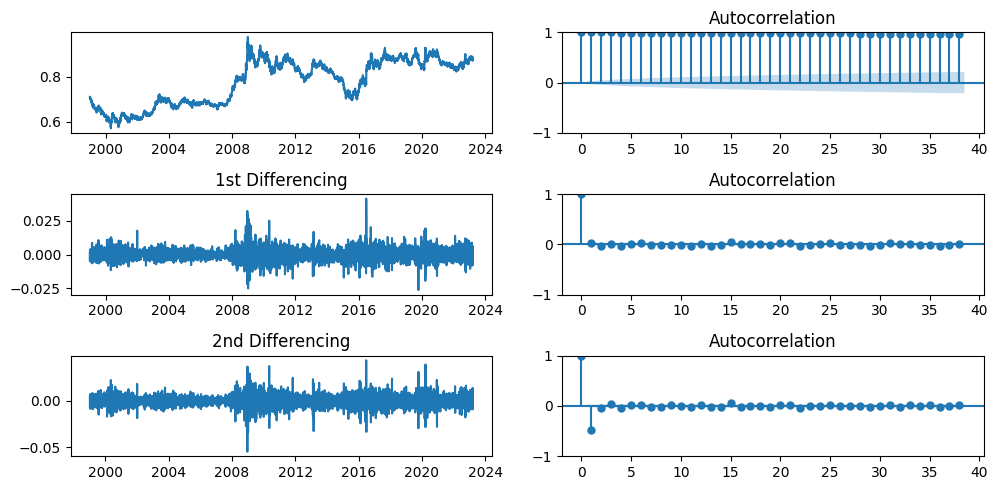

In [77]:
fig, axes = plt.subplots(3, 2, figsize=(10,5))
axes[0, 0].plot(df_gbp)
plot_acf(df_gbp, ax=axes[0, 1])

# # 1st Differencing
axes[1, 0].plot(df_gbp.diff())
plot_acf(df_gbp.diff().dropna(), ax=axes[1, 1])
axes[1, 0].set_title('1st Differencing')

# # 2nd Differencing
axes[2, 0].plot(df_gbp.diff().diff())
plot_acf(df_gbp.diff().diff().dropna(), ax=axes[2, 1])
axes[2, 0].set_title('2nd Differencing')

plt.tight_layout()

<Figure size 1200x600 with 0 Axes>

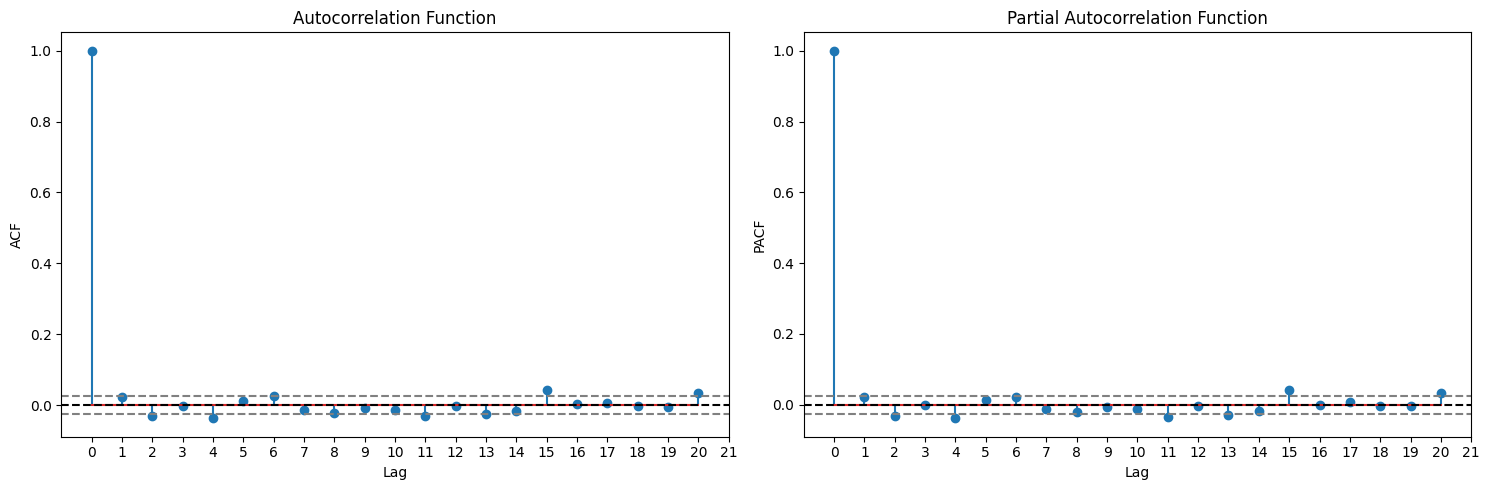

In [78]:
plt.figure(figsize=(12,6))

lag_acf = acf(diff_data, nlags = 20)
lag_pacf = pacf(diff_data, nlags = 20, method = 'ols')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(diff_data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff_data)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color='black')
plt.axhline(y = -1.96/np.sqrt(len(diff_data)), linestyle = '--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(diff_data)), linestyle = '--', color='gray')
plt.xlabel('Lag')
plt.xticks(range(0,22,1))
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

### FORECASTING 

In [82]:
train_gbp = df_gbp[df_gbp.index.year < 2022]
test_gbp = df_gbp[df_gbp.index.year == 2022]
len(train_gbp), len(test_gbp)

(5890, 257)

### ARIMA 

In [83]:
from pmdarima.arima import auto_arima

auto_arima=auto_arima(train_gbp, start_p=1, start_q=1,
                      max_p=3, max_q=3, seasonal=False,
                      d=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-48282.615, Time=0.63 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-48284.146, Time=1.73 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-48290.107, Time=1.48 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-48288.221, Time=3.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-48283.898, Time=0.85 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-48288.064, Time=1.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-48289.981, Time=1.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-48286.573, Time=6.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-48289.467, Time=1.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-48287.743, Time=0.81 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-48288.110, Time=1.54 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-48280.989, Time=1.76 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-48287.554, Time=3.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-48285.575, Time=3.72 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-48286

In [84]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5890
Model:               SARIMAX(0, 1, 2)   Log Likelihood               24149.053
Date:                Wed, 10 May 2023   AIC                         -48290.107
Time:                        09:20:35   BIC                         -48263.384
Sample:                             0   HQIC                        -48280.818
                               - 5890                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.222e-05   5.26e-05      0.423      0.673   -8.08e-05       0.000
ma.L1          0.0260      0.007      3.730      0.000       0.012       0.040
ma.L2         -0.0358      0.008     -4.399      0.000      -0.052      -0.020
sigma2      1.606e-05   1.43e-07    111.988      0.000    1.58e-05    1.63e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             11837.37
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.17   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
predictions = []
arima = ARIMA(train_gbp, order=(0,1,2)).fit()

In [86]:
predictions.append(arima.forecast(257))

In [87]:
predictions = np.array(predictions).reshape((257,))
predictions

array([0.84037137, 0.84033631, 0.84033631, 0.84033631, 0.84033631,
       0.84033631, 0.84033631, 0.84033631, 0.84033631, 0.84033631,
       0.84033631, 0.84033631, 0.84033631, 0.84033631, 0.84033631,
       0.84033631, 0.84033631, 0.84033631, 0.84033631, 0.84033631,
       0.84033631, 0.84033631, 0.84033631, 0.84033631, 0.84033631,
       0.84033631, 0.84033631, 0.84033631, 0.84033631, 0.84033631,
       0.84033631, 0.84033631, 0.84033631, 0.84033631, 0.84033631,
       0.84033631, 0.84033631, 0.84033631, 0.84033631, 0.84033631,
       0.84033631, 0.84033631, 0.84033631, 0.84033631, 0.84033631,
       0.84033631, 0.84033631, 0.84033631, 0.84033631, 0.84033631,
       0.84033631, 0.84033631, 0.84033631, 0.84033631, 0.84033631,
       0.84033631, 0.84033631, 0.84033631, 0.84033631, 0.84033631,
       0.84033631, 0.84033631, 0.84033631, 0.84033631, 0.84033631,
       0.84033631, 0.84033631, 0.84033631, 0.84033631, 0.84033631,
       0.84033631, 0.84033631, 0.84033631, 0.84033631, 0.84033

In [88]:
test_gbp['arima_pred'] = predictions

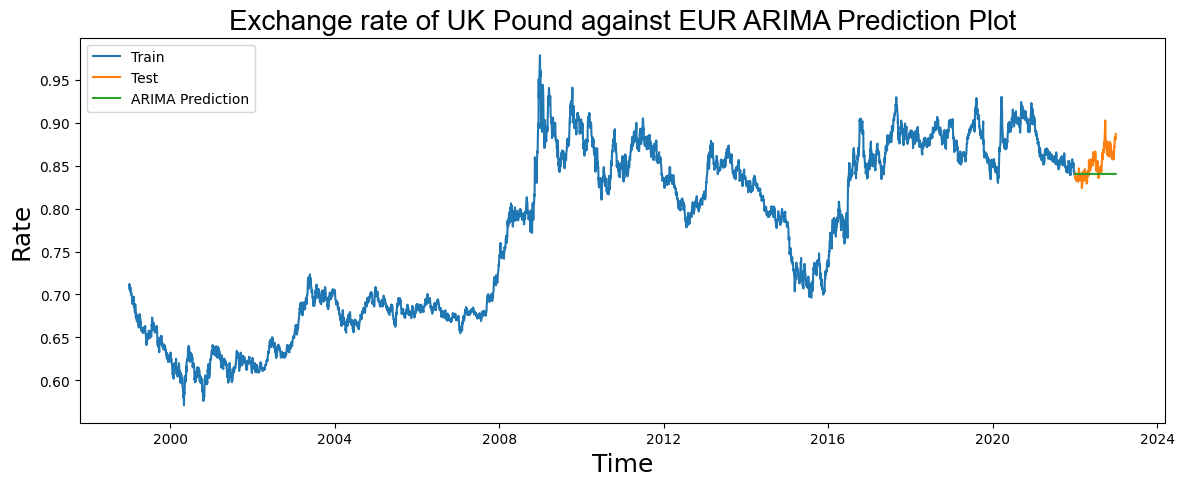

In [89]:
plt.figure(figsize=(14,5))
plt.plot(train_gbp.index,train_gbp['GBP'].values, label = 'Train')   
plt.plot([None for i in train_gbp.index] + [x for x in test_gbp.index], [None for i in train_gbp.values] + [x for x in test_gbp['GBP'].values], label = 'Test')
plt.plot([None for i in train_gbp.index] + [x for x in test_gbp.index],[None for i in train_gbp.values] + [x for x in test_gbp['arima_pred'].values], label = 'ARIMA Prediction')
plt.title('Exchange rate of UK Pound against EUR ARIMA Prediction Plot', family='Arial', fontsize=20)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Rate', fontsize=18)
plt.legend(loc = 'best')

In [90]:
arima_mae = mean_absolute_error(test_gbp['GBP'],test_gbp['arima_pred'])
arima_mse = mean_squared_error(test_gbp['GBP'], test_gbp['arima_pred'])
arima_rmse = np.sqrt(mean_squared_error(test_gbp['GBP'], test_gbp['arima_pred']))
mape = mean_absolute_percentage_error(test_gbp['GBP'], test_gbp['arima_pred'])
accuracy = (1-mape)*100

print('Mean Absolute Error:   ', arima_mae)
print('Mean Squared Error:   ', arima_mse)
print('Root Mean Squared Error:   ', arima_rmse)
print('mape:   ', mape)
print('accuracy:   ', accuracy)

Mean Absolute Error:    0.015474639135025826
Mean Squared Error:    0.0004045223066482931
Root Mean Squared Error:    0.020112739909030126
mape:    0.017894909926203538
accuracy:    98.21050900737964


### AUD/EUR

In [91]:
#get the date and rates of singapore dollar
df_aud = df5[['Date', 'AUD']]
df_aud.columns = ['Date', 'AUD']
df_aud.sort_values(by='Date', inplace = True)

In [92]:
df_aud.head()

,Date,AUD
6205,1999-01-04,1.9100
6204,1999-01-05,1.8944
6203,1999-01-06,1.8820
6202,1999-01-07,1.8474
6201,1999-01-08,1.8406


In [93]:
df_aud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6206 entries, 6205 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6206 non-null   datetime64[ns]
 1   AUD     6206 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 145.5 KB


In [94]:
#sort values by date
df_aud = df_aud.sort_values('Date', ascending=True)
df_aud.AUD.describe()

count    6206.000000
mean        1.576674
std         0.149233
min         1.163900
25%         1.481200
50%         1.595050
75%         1.668875
max         2.073500
Name: AUD, dtype: float64

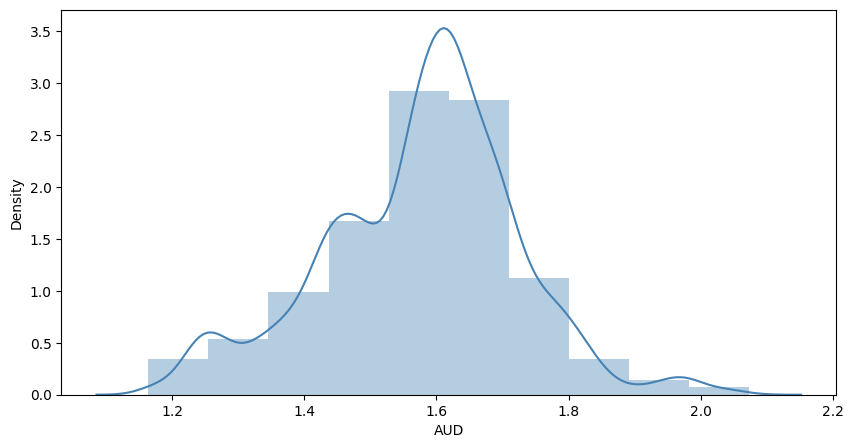

In [95]:
plt.figure(figsize=(10,5))
sns.distplot(df_aud.AUD, bins=10, color='steelblue');

### ACF and PACF plots

In [96]:
df_aud = df_aud.set_index('Date')

<Figure size 1200x600 with 0 Axes>

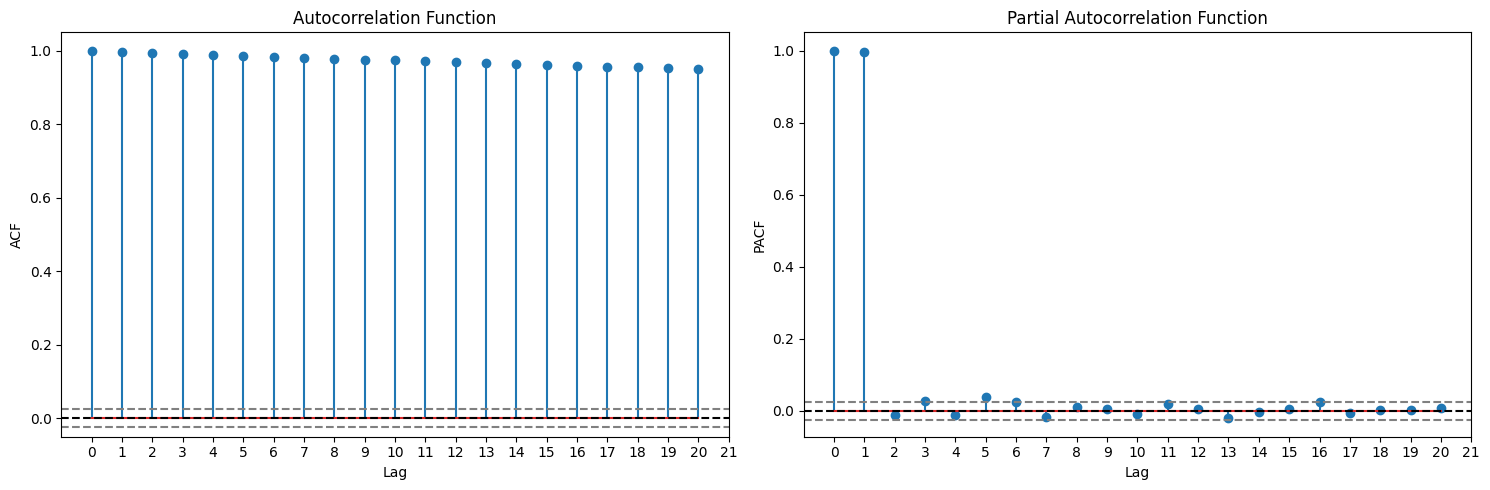

In [97]:
plt.figure(figsize=(12,6))
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df_aud.AUD, nlags = 20)
lag_pacf = pacf(df_aud.AUD, nlags = 20, method = 'ols')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(df_aud)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_aud)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color='black')
plt.axhline(y = -1.96/np.sqrt(len(df_aud)), linestyle = '--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(df_aud)), linestyle = '--', color='gray')
plt.xlabel('Lag')
plt.xticks(range(0,22,1))
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

### Seasonal decomposition plot

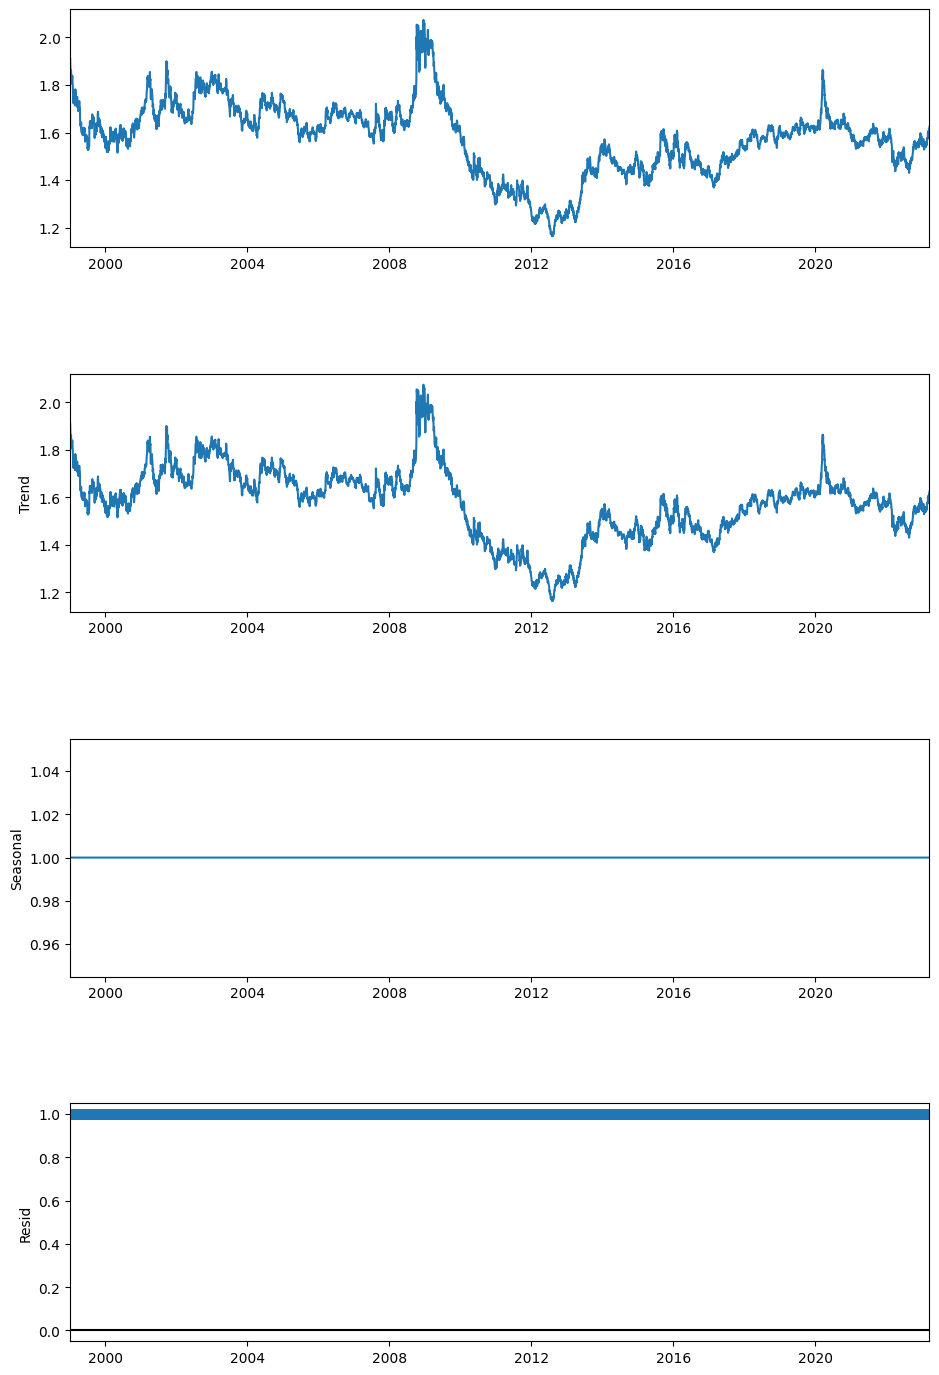

In [98]:
decompostion =seasonal_decompose(df_aud, model='multiplicative', period=1)
fig=decompostion.plot()
fig.set_size_inches(10,15)
plt.show()

### Differenecing

In [99]:
diff_data = df_aud.copy()
diff_data = diff_data.diff()
diff_data = diff_data.dropna() 

print('############# Raw Data ##############')
print(df_aud)
print ('########### Differenced Data ###########')
print(diff_data)

############# Raw Data ##############
               AUD
Date              
1999-01-04  1.9100
1999-01-05  1.8944
1999-01-06  1.8820
1999-01-07  1.8474
1999-01-08  1.8406
...            ...
2023-03-17  1.5874
2023-03-20  1.5978
2023-03-21  1.6136
2023-03-22  1.6132
2023-03-23  1.6242

[6206 rows x 1 columns]
########### Differenced Data ###########
               AUD
Date              
1999-01-05 -0.0156
1999-01-06 -0.0124
1999-01-07 -0.0346
1999-01-08 -0.0068
1999-01-11 -0.0272
...            ...
2023-03-17 -0.0058
2023-03-20  0.0104
2023-03-21  0.0158
2023-03-22 -0.0004
2023-03-23  0.0110

[6205 rows x 1 columns]


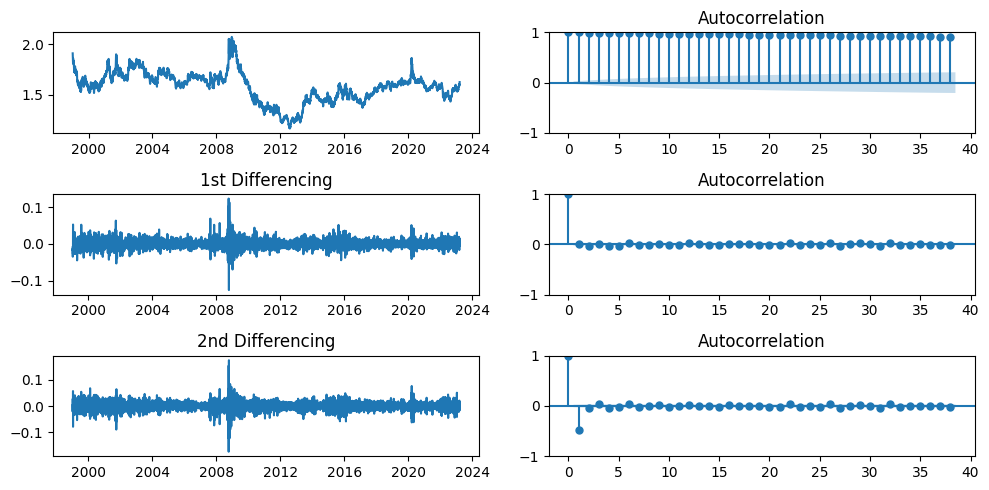

In [100]:
fig, axes = plt.subplots(3, 2, figsize=(10,5))
axes[0, 0].plot(df_aud)
plot_acf(df_aud, ax=axes[0, 1])

# # 1st Differencing
axes[1, 0].plot(df_aud.diff())
plot_acf(df_aud.diff().dropna(), ax=axes[1, 1])
axes[1, 0].set_title('1st Differencing')

# # 2nd Differencing
axes[2, 0].plot(df_aud.diff().diff())
plot_acf(df_aud.diff().diff().dropna(), ax=axes[2, 1])
axes[2, 0].set_title('2nd Differencing')

plt.tight_layout()

<Figure size 1200x600 with 0 Axes>

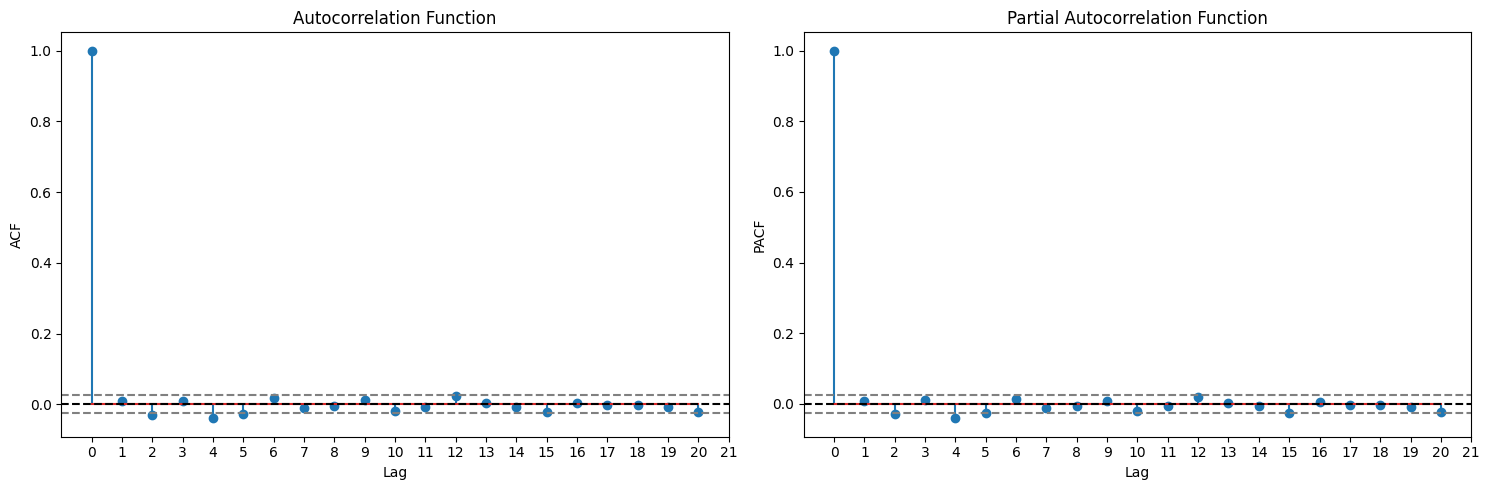

In [101]:
plt.figure(figsize=(12,6))

lag_acf = acf(diff_data, nlags = 20)
lag_pacf = pacf(diff_data, nlags = 20, method = 'ols')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(diff_data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff_data)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color='black')
plt.axhline(y = -1.96/np.sqrt(len(diff_data)), linestyle = '--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(diff_data)), linestyle = '--', color='gray')
plt.xlabel('Lag')
plt.xticks(range(0,22,1))
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

### FORECASTING 

In [102]:
train_aud = df_aud[df_aud.index.year< 2022]
test_aud = df_aud[df_aud.index.year== 2022]
len(train_aud), len(test_aud)

(5890, 257)

### ARIMA 

In [103]:
from pmdarima.arima import auto_arima

auto_arima=auto_arima(train_aud, start_p=1, start_q=1,
                      max_p=3, max_q=3, seasonal=False,
                      d=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-36636.388, Time=0.64 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-36636.252, Time=1.47 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-36640.977, Time=1.00 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-36639.660, Time=0.99 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-36636.138, Time=1.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-36639.178, Time=1.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-36638.601, Time=1.48 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-36637.609, Time=1.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-36640.324, Time=1.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-36640.692, Time=1.94 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-36640.304, Time=2.44 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-36636.388, Time=2.70 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-36639.254, Time=2.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-36637.309, Time=2.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-36639

In [104]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5890
Model:               SARIMAX(0, 1, 2)   Log Likelihood               18324.488
Date:                Wed, 10 May 2023   AIC                         -36640.977
Time:                        09:24:18   BIC                         -36614.253
Sample:                             0   HQIC                        -36631.688
                               - 5890                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -5.801e-05      0.000     -0.406      0.685      -0.000       0.000
ma.L1          0.0159      0.007      2.435      0.015       0.003       0.029
ma.L2         -0.0350      0.005     -7.005      0.000      -0.045      -0.025
sigma2         0.0001   8.26e-07    140.543      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             38268.59
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                             0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [105]:
predictions = []
arima = ARIMA(train_aud, order=(0,1,2)).fit()

In [106]:
predictions.append(arima.forecast(257))

In [107]:
predictions = np.array(predictions).reshape((257,))
predictions

array([1.56170281, 1.56162211, 1.56162211, 1.56162211, 1.56162211,
       1.56162211, 1.56162211, 1.56162211, 1.56162211, 1.56162211,
       1.56162211, 1.56162211, 1.56162211, 1.56162211, 1.56162211,
       1.56162211, 1.56162211, 1.56162211, 1.56162211, 1.56162211,
       1.56162211, 1.56162211, 1.56162211, 1.56162211, 1.56162211,
       1.56162211, 1.56162211, 1.56162211, 1.56162211, 1.56162211,
       1.56162211, 1.56162211, 1.56162211, 1.56162211, 1.56162211,
       1.56162211, 1.56162211, 1.56162211, 1.56162211, 1.56162211,
       1.56162211, 1.56162211, 1.56162211, 1.56162211, 1.56162211,
       1.56162211, 1.56162211, 1.56162211, 1.56162211, 1.56162211,
       1.56162211, 1.56162211, 1.56162211, 1.56162211, 1.56162211,
       1.56162211, 1.56162211, 1.56162211, 1.56162211, 1.56162211,
       1.56162211, 1.56162211, 1.56162211, 1.56162211, 1.56162211,
       1.56162211, 1.56162211, 1.56162211, 1.56162211, 1.56162211,
       1.56162211, 1.56162211, 1.56162211, 1.56162211, 1.56162

In [110]:
test_aud['arima_pred'] = predictions

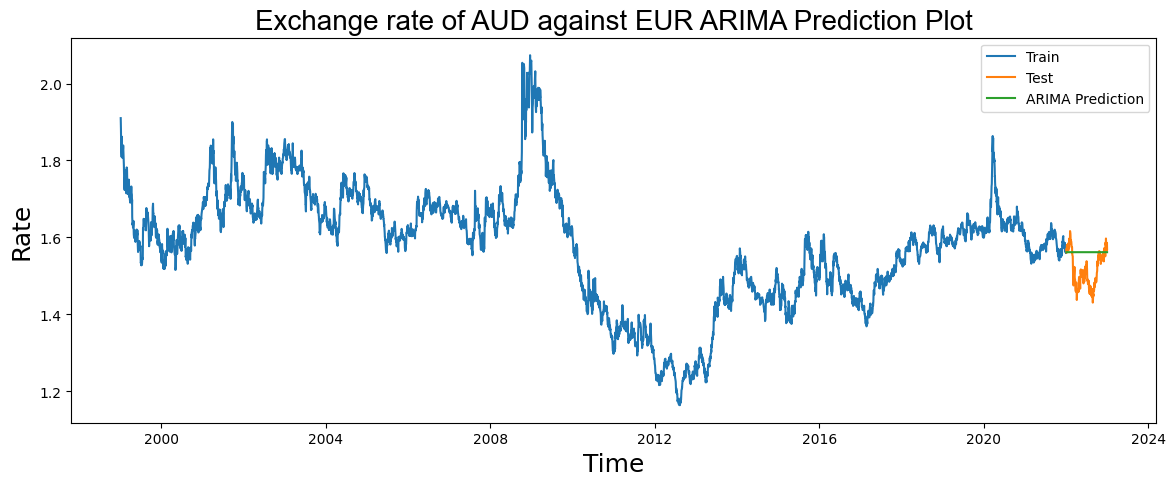

In [111]:
plt.figure(figsize=(14,5))
plt.plot(train_aud.index,train_aud['AUD'].values, label = 'Train')   
plt.plot([None for i in train_aud.index] + [x for x in test_aud.index], [None for i in train_aud.values] + [x for x in test_aud['AUD'].values], label = 'Test')
plt.plot([None for i in train_aud.index] + [x for x in test_aud.index],[None for i in train_aud.values] + [x for x in test_aud['arima_pred'].values], label = 'ARIMA Prediction')
plt.title('Exchange rate of AUD against EUR ARIMA Prediction Plot', family='Arial', fontsize=20)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Rate', fontsize=18)
plt.legend(loc = 'best')

In [112]:
arima_mae = mean_absolute_error(test_aud['AUD'],test_aud['arima_pred'])
arima_mse = mean_squared_error(test_aud['AUD'], test_aud['arima_pred'])
arima_rmse = np.sqrt(mean_squared_error(test_aud['AUD'], test_aud['arima_pred']))
mape = mean_absolute_percentage_error(test_aud['AUD'], test_aud['arima_pred'])
accuracy = (1-mape)*100

print('Mean Absolute Error:   ', arima_mae)
print('Mean Squared Error:   ', arima_mse)
print('Root Mean Squared Error:   ', arima_rmse)
print('mape:   ', mape)
print('accuracy:   ', accuracy)

Mean Absolute Error:    0.05262357334483647
Mean Squared Error:    0.004022255615597031
Root Mean Squared Error:    0.0634212552351105
mape:    0.03536463802122435
accuracy:    96.46353619787756


### CAD/EUR

In [113]:
#get the date and rates of singapore dollar
df_cad = df5[['Date', 'CAD']]
df_cad.columns = ['Date', 'CAD']
df_cad.sort_values(by='Date', inplace = True)

In [114]:
df_cad.head()

,Date,CAD
6205,1999-01-04,1.8004
6204,1999-01-05,1.7965
6203,1999-01-06,1.7711
6202,1999-01-07,1.7602
6201,1999-01-08,1.7643


In [115]:
df_cad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6206 entries, 6205 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6206 non-null   datetime64[ns]
 1   CAD     6206 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 145.5 KB


In [116]:
#sort values by date
df_cad = df_cad.sort_values('Date', ascending=True)
df_cad.CAD.describe()

count    6206.000000
mean        1.465535
std         0.097687
min         1.213900
25%         1.396800
50%         1.462700
75%         1.538775
max         1.812300
Name: CAD, dtype: float64

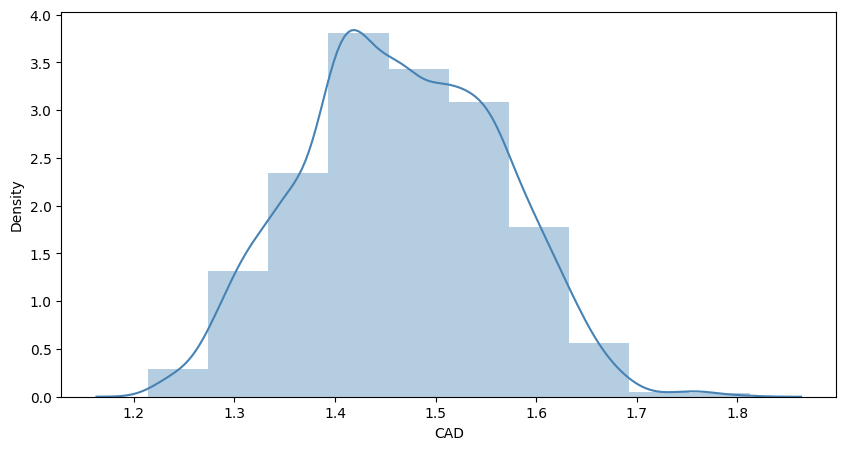

In [117]:
plt.figure(figsize=(10,5))
sns.distplot(df_cad.CAD, bins=10, color='steelblue');

### ACF and PACF plots

In [118]:
df_cad = df_cad.set_index('Date')

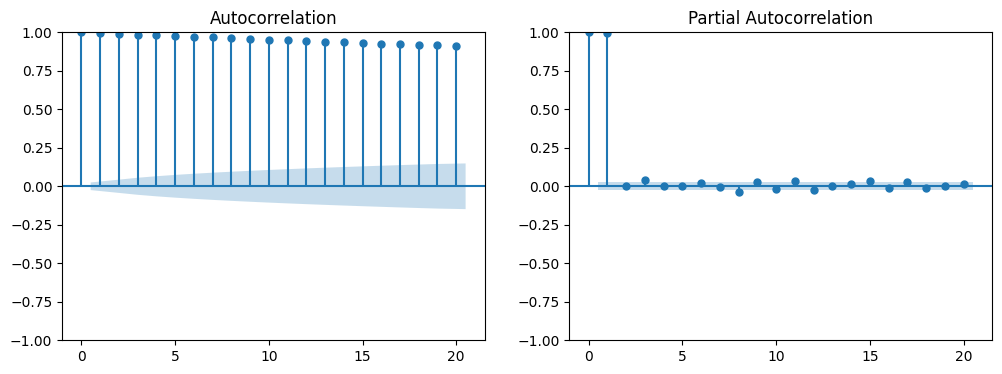

In [119]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
plot_acf(df_cad, lags=20, ax=ax[0]);
plot_pacf(df_cad, lags=20, ax=ax[1]);

### Seasonal decomposition plot

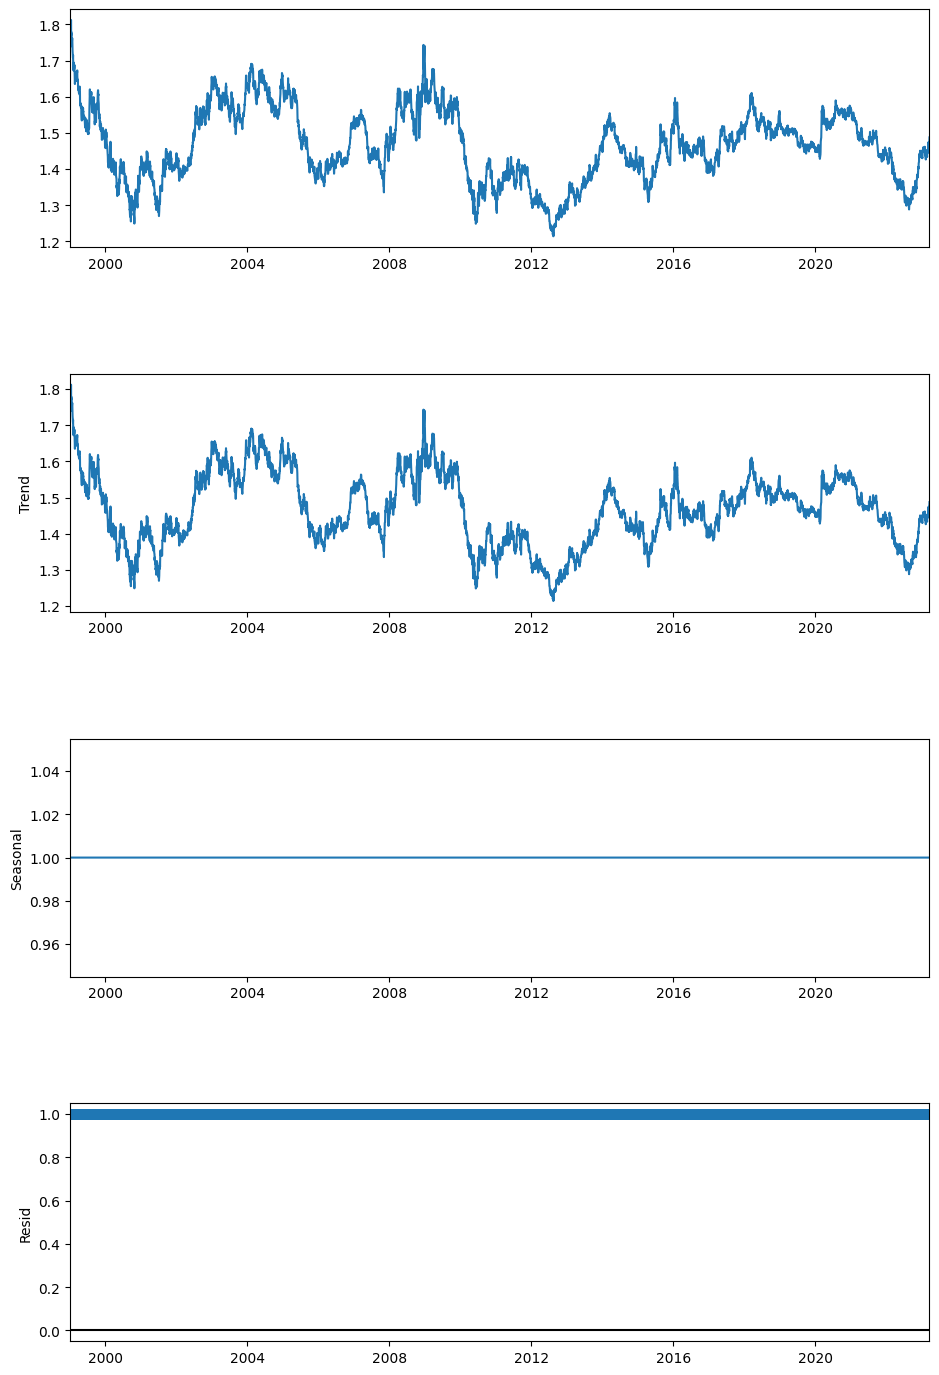

In [120]:
decompostion =seasonal_decompose(df_cad, model='multiplicative', period=1)
fig=decompostion.plot()
fig.set_size_inches(10,15)
plt.show()

### Differenecing

In [121]:
diff_data = df_cad.copy()
diff_data = diff_data.diff()
diff_data = diff_data.dropna() 

print('############# Raw Data ##############')
print(df_cad)
print ('########### Differenced Data ###########')
print(diff_data)

############# Raw Data ##############
               CAD
Date              
1999-01-04  1.8004
1999-01-05  1.7965
1999-01-06  1.7711
1999-01-07  1.7602
1999-01-08  1.7643
...            ...
2023-03-17  1.4584
2023-03-20  1.4669
2023-03-21  1.4726
2023-03-22  1.4782
2023-03-23  1.4875

[6206 rows x 1 columns]
########### Differenced Data ###########
               CAD
Date              
1999-01-05 -0.0039
1999-01-06 -0.0254
1999-01-07 -0.0109
1999-01-08  0.0041
1999-01-11 -0.0180
...            ...
2023-03-17  0.0019
2023-03-20  0.0085
2023-03-21  0.0057
2023-03-22  0.0056
2023-03-23  0.0093

[6205 rows x 1 columns]


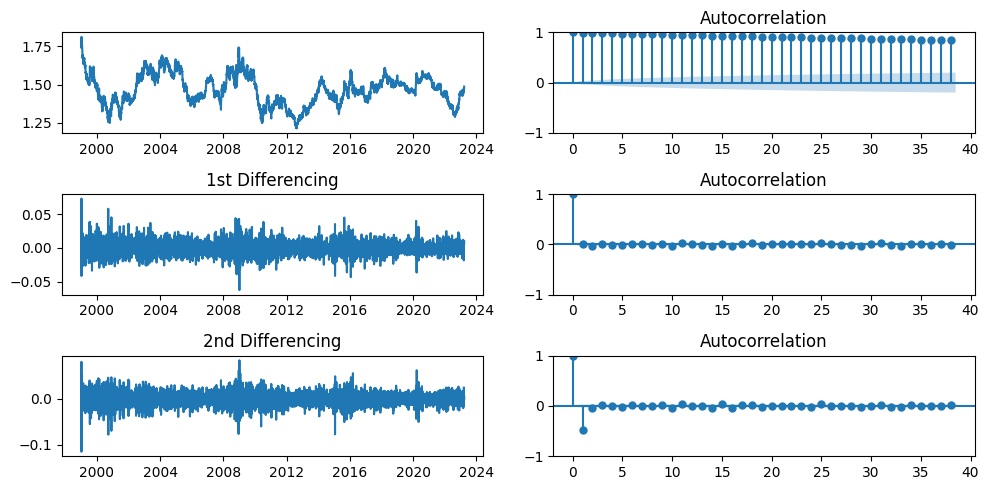

In [122]:
fig, axes = plt.subplots(3, 2, figsize=(10,5))
axes[0, 0].plot(df_cad)
plot_acf(df_cad, ax=axes[0, 1])

# # 1st Differencing
axes[1, 0].plot(df_cad.diff())
plot_acf(df_cad.diff().dropna(), ax=axes[1, 1])
axes[1, 0].set_title('1st Differencing')

# # 2nd Differencing
axes[2, 0].plot(df_cad.diff().diff())
plot_acf(df_cad.diff().diff().dropna(), ax=axes[2, 1])
axes[2, 0].set_title('2nd Differencing')

plt.tight_layout()

<Figure size 1200x600 with 0 Axes>

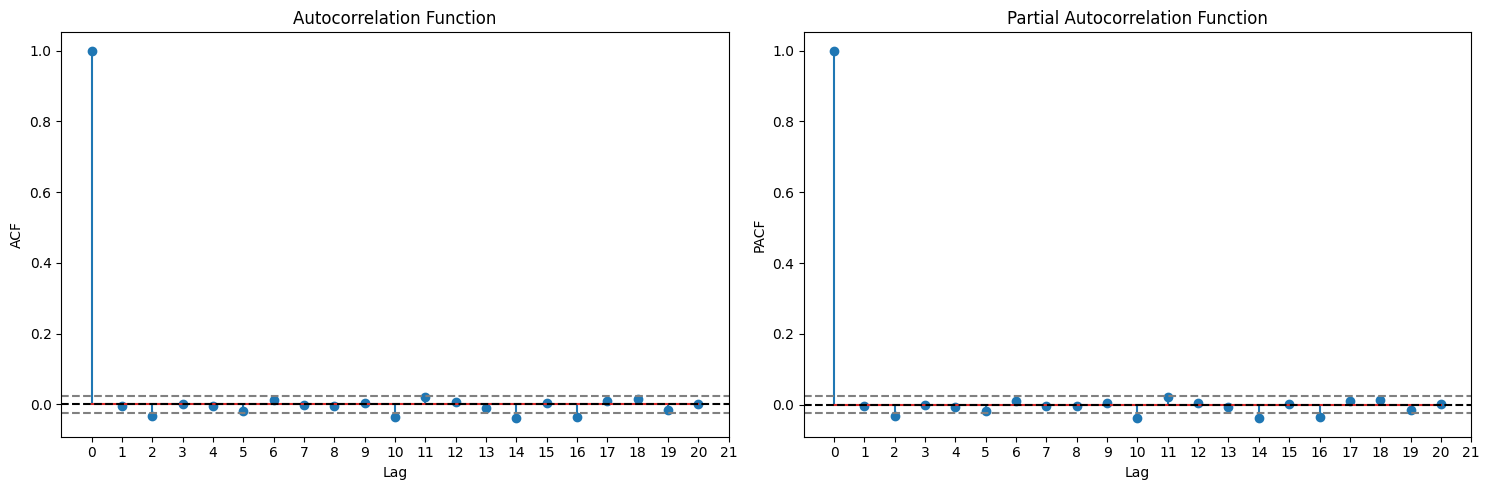

In [123]:
plt.figure(figsize=(12,6))

lag_acf = acf(diff_data, nlags = 20)
lag_pacf = pacf(diff_data, nlags = 20, method = 'ols')

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(diff_data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff_data)),linestyle='--',color='gray')
plt.xticks(range(0,22,1))
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color='black')
plt.axhline(y = -1.96/np.sqrt(len(diff_data)), linestyle = '--', color='gray')
plt.axhline(y = 1.96/np.sqrt(len(diff_data)), linestyle = '--', color='gray')
plt.xlabel('Lag')
plt.xticks(range(0,22,1))
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

### FORECASTING 

In [124]:
train_cad = df_cad[df_cad.index.year < 2022]
test_cad = df_cad[df_cad.index.year == 2022]
len(train_cad), len(test_cad)

(5890, 257)

### ARIMA 

In [125]:
from pmdarima.arima import auto_arima

auto_arima=auto_arima(train_cad, start_p=1, start_q=1,
                      max_p=3, max_q=3, seasonal=False,
                      d=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-38585.877, Time=0.63 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-38583.918, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-38589.118, Time=1.39 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-38586.754, Time=2.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-38583.922, Time=0.54 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-38582.035, Time=1.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-38587.101, Time=2.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-38584.772, Time=2.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-38589.047, Time=1.96 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-38587.043, Time=3.62 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-38585.244, Time=4.74 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-38583.140, Time=3.47 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-38587.042, Time=1.80 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-38585.044, Time=6.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-38575

In [126]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5890
Model:               SARIMAX(0, 1, 2)   Log Likelihood               19298.559
Date:                Wed, 10 May 2023   AIC                         -38589.118
Time:                        09:32:12   BIC                         -38562.394
Sample:                             0   HQIC                        -38579.829
                               - 5890                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -6.046e-05      0.000     -0.525      0.600      -0.000       0.000
ma.L1         -0.0038      0.009     -0.414      0.679      -0.022       0.014
ma.L2         -0.0352      0.010     -3.472      0.001      -0.055      -0.015
sigma2      8.335e-05   9.67e-07     86.169      0.000    8.15e-05    8.53e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2463.97
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [130]:
predictions = []
arima = ARIMA(train_cad, order=(0,1,2)).fit()

In [131]:
predictions.append(arima.forecast(257))

In [132]:
predictions = np.array(predictions).reshape((257,))
predictions

array([1.43935595, 1.43966526, 1.43966526, 1.43966526, 1.43966526,
       1.43966526, 1.43966526, 1.43966526, 1.43966526, 1.43966526,
       1.43966526, 1.43966526, 1.43966526, 1.43966526, 1.43966526,
       1.43966526, 1.43966526, 1.43966526, 1.43966526, 1.43966526,
       1.43966526, 1.43966526, 1.43966526, 1.43966526, 1.43966526,
       1.43966526, 1.43966526, 1.43966526, 1.43966526, 1.43966526,
       1.43966526, 1.43966526, 1.43966526, 1.43966526, 1.43966526,
       1.43966526, 1.43966526, 1.43966526, 1.43966526, 1.43966526,
       1.43966526, 1.43966526, 1.43966526, 1.43966526, 1.43966526,
       1.43966526, 1.43966526, 1.43966526, 1.43966526, 1.43966526,
       1.43966526, 1.43966526, 1.43966526, 1.43966526, 1.43966526,
       1.43966526, 1.43966526, 1.43966526, 1.43966526, 1.43966526,
       1.43966526, 1.43966526, 1.43966526, 1.43966526, 1.43966526,
       1.43966526, 1.43966526, 1.43966526, 1.43966526, 1.43966526,
       1.43966526, 1.43966526, 1.43966526, 1.43966526, 1.43966

In [134]:
test_cad['arima_pred'] = predictions

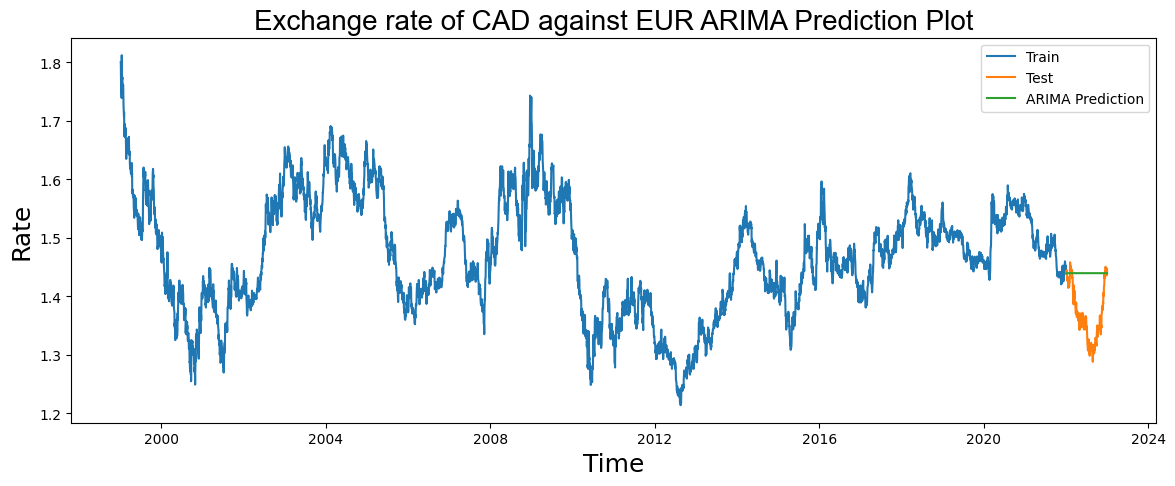

In [135]:
plt.figure(figsize=(14,5))
plt.plot(train_cad.index,train_cad['CAD'].values, label = 'Train')   
plt.plot([None for i in train_cad.index] + [x for x in test_cad.index], [None for i in train_cad.values] + [x for x in test_cad['CAD'].values], label = 'Test')
plt.plot([None for i in train_cad.index] + [x for x in test_cad.index],[None for i in train_cad.values] + [x for x in test_cad['arima_pred'].values], label = 'ARIMA Prediction')
plt.title('Exchange rate of CAD against EUR ARIMA Prediction Plot', family='Arial', fontsize=20)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Rate', fontsize=18)
plt.legend(loc = 'best')

In [137]:
arima_mae = mean_absolute_error(test_cad['CAD'],test_cad['arima_pred'])
arima_mse = mean_squared_error(test_cad['CAD'], test_cad['arima_pred'])
arima_rmse = np.sqrt(mean_squared_error(test_cad['CAD'], test_cad['arima_pred']))
mape = mean_absolute_percentage_error(test_cad['CAD'], test_cad['arima_pred'])
accuracy = (1-mape)*100

print('Mean Absolute Error:   ', arima_mae)
print('Mean Squared Error:   ', arima_mse)
print('Root Mean Squared Error:   ', arima_rmse)
print('mape:   ', mape)
print('accuracy:   ', accuracy)
print('accuracy:   ', accuracy)

Mean Absolute Error:    0.07156870467032951
Mean Squared Error:    0.00703025730117967
Root Mean Squared Error:    0.08384662963518373
mape:    0.05337425181228312
accuracy:    94.66257481877169
accuracy:    94.66257481877169
